# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [1]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import colorcet as cc
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
import colorcet as cc

## Unsupervised learning - classification
Now we load the transformed dataset from the csv we created in the second jupyter notebook.

In [2]:
# Load the dataset
df = pd.read_csv("preprocessed_dataset.csv", header=0, index_col=0, engine='python')

df

Source IP  Source Port  Destination Port  Total Fwd Packets  \
0      -0.036507    -0.996890          1.463534           0.169121   
1       1.464073    -0.996890          1.463534          -0.036372   
2      -0.036507    -0.996890          0.770389           0.391920   
3      -0.036507    -0.996890         -0.924976           0.391920   
4      -0.036507    -0.996890         -0.139438           0.391920   
...          ...          ...               ...                ...   
65995  -0.036507     0.540571          1.589149          -0.036372   
65996  -0.036507     1.350236         -0.577568          -0.027720   
65997  -0.036507     0.843239          1.670387          -0.036372   
65998  -0.036507     1.433360         -0.996433          -0.032046   
65999  -0.036507     0.822924         -1.441345          -0.036372   

       Fwd Packet Length Max  Fwd Packet Length Std  Bwd Packet Length Max  \
0                  -0.297075              -0.172277              -0.069596   
1                  -0.297075              -0.172277              -0.069596   
2                  -0.297075              -0.172277              -0.069596   
3                  -0.297075              -0.172277              -0.069596   
4                  -0.297075              -0.172277              -0.069596   
...                      ...                    ...                    ...   
65995              -0.408056              -0.172277              -0.069596   
65996              -0.377323               0.521580              -0.069596   
65997              -0.408056              -0.172277              -0.069596   
65998              -0.384152               0.501315              -0.069596   
65999              -0.408056              -0.172277              -0.069596   

       Bwd Packet Length Min  Flow Bytes/s  Fwd IAT Min  ...  \
0                  -0.146261     -0.765426    -0.014034  ...   
1                  -0.146261     -0.324952    -0.014030  ...   
2                  -0.146261     -0.765114    -0.014034  ...   
3                  -0.146261     -0.765106    -0.014034  ...   
4                  -0.146261     -0.764174    -0.014038  ...   
...                      ...           ...          ...  ...   
65995              -0.146261     -0.013555    -0.014034  ...   
65996              -0.146261     -0.766925    -0.014034  ...   
65997              -0.146261     -0.013555    -0.014034  ...   
65998              -0.146261     -0.766921    -0.014034  ...   
65999              -0.146261     -0.013555    -0.014034  ...   

       Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
0                   -0.266314                -0.102881          1.765456   
1                   -0.266314                -0.102881         -0.265447   
2                   -0.266314                -0.102881          3.967382   
3                   -0.266314                -0.102881          3.967382   
4                   -0.266314                -0.102881          3.967382   
...                       ...                      ...               ...   
65995               -0.266314                -0.102881         -0.265447   
65996               -0.266314                -0.102881         -0.179935   
65997               -0.266314                -0.102881         -0.265447   
65998               -0.266314                -0.102881         -0.222691   
65999               -0.266314                -0.102881         -0.265447   

       Active Max  Active Min  Idle Std  Idle Min   Inbound  protocol_0  \
0       -0.044084   -0.037205 -0.165955 -0.194882  0.295752   -0.030062   
1       -0.044084   -0.037205 -0.165955 -0.194882 -3.381206   -0.030062   
2       -0.044084   -0.037205 -0.165955 -0.194882  0.295752   -0.030062   
3       -0.044084   -0.037205 -0.165955 -0.194882  0.295752   -0.030062   
4       -0.044084   -0.037205 -0.165955 -0.194882  0.295752   -0.030062   
...           ...         ...       ...       ...       ...         ...   
65995   -0.044084   -0

In [3]:
X = df.drop(columns = 'label').to_numpy()
y = df['label'].values

#### PCA
Later on we will visualize the obtained clusters using PCA.

In [4]:
#2D PCA
pca = PCA(n_components=2)
projection = pca.fit_transform(X)
projection = pd.DataFrame(projection)

#### T-SNE

<a href="https://www.datacamp.com/tutorial/introduction-t-sne">t-SNE</a> (t-distributed Stochastic Neighbor Embedding) is a powerful technique for dimensionality reduction and data visualization. It is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data.

Perplexity is an important hyperparameter for the t-SNE algorithm. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 
We will run a loop to get the Kullback-Leibler (KL) Divergence metric between the high and low-dimensional probability distributions, on various perplexities from 5 to 125 with a 5-point gap. Low KL divergence is normally a sign of better results.

Complexity: $O(n^2)$


In [5]:
perplexity = np.arange(5, 125, 5)

In [6]:
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X)
    divergence.append(model.kl_divergence_)

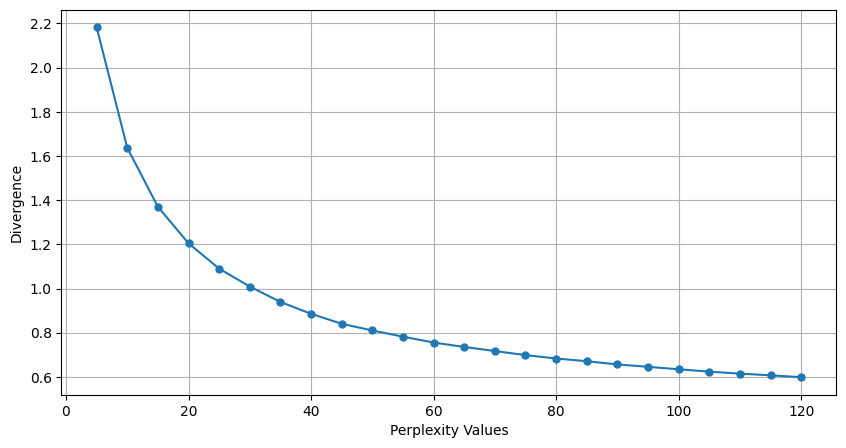

In [7]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(perplexity, divergence, marker='o', markersize=5)
# plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Perplexity Values')
plt.ylabel('Divergence')
plt.show()

We can consider the KL Divergence as constant after 100 perplexity. Anyway, we will use 50 perplexity in the t-SNE algorithm since the clusters visulizations are quite similar to the ones obtained with 115.

In [8]:
# 2D T-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state = 11)
projection_tsne = tsne.fit_transform(X)
projection_tsne = pd.DataFrame(projection_tsne)
print("KL divergence: ",tsne.kl_divergence_)

KL divergence:  0.807953953742981


## K-means
**k-Means** is a hard clustering approach (each sample is associated with one and only one cluster), that partitions m observations to k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).
Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">K-means in sklearn</a>.

Regarding the ``init`` hyper-parameter, we leave the default option *k-means++* because it will make it so that the centroids will be equally distant from each other, thus probably leading to better results.  

In [9]:
# k-means
# k-Means with n_clusters = 12, which is the number of labels
kmeans = KMeans(n_clusters=12, random_state=11)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
cl_labels12_km = kmeans.fit_predict(X)

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels12_km,  random_state=11)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels12_km)
ari = adjusted_rand_score(np.ravel(y), cl_labels12_km)

print('k-Means with 12 clusters')
(unique, counts)=np.unique( cl_labels12_km, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 12 clusters
Size of each cluster:  [18810 23997  8870    38  2775    58    27   559  2295  2178  4083   549]
k_means clustering error: 878374.08
Silhouette: 0.38
RI: 0.81
ARI: 0.36


The silhouette ranges between -1 and 1, where 1 indicates that the object is well matched with its own cluster and poorly matched to the others, while scores around zero indicates overlapping clusters.

We want to understand which is the optimal ``n_clusters`` to use in terms of the clustering error and, particularly, the silhoutte. We already know that the clustering error favours an higher number: by increasing the number of clusters the average distance from the points to the corresponding cluster means (which defines the clustering error) can not decrease.

In [10]:
n_cluster_list_kmeans=[]
shs_list_kmeans = []
ri_list_kmeans = []
ari_list_kmeans = []
inertia_list_kmeans=[]

for n_clusters in range(10, 61):
    kmeans = KMeans(n_clusters=n_clusters, random_state=11)
    kmeans_labels = kmeans.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, kmeans_labels, random_state=11)
    n_cluster_list_kmeans.append(n_clusters)
    shs_list_kmeans.append(silhouette)
    ri_list_kmeans.append(rand_score(np.ravel(y), kmeans_labels))
    ari_list_kmeans.append(adjusted_rand_score(np.ravel(y), kmeans_labels))
    inertia_list_kmeans.append(kmeans.inertia_)
    print(f"{n_clusters} clusters: clustering_error {round(kmeans.inertia_, 2)}, silhouette {round(silhouette, 3)}, ari {round(adjusted_rand_score(np.ravel(y), kmeans_labels), 3)}")

10 clusters: clustering_error 1005405.22, silhouette 0.318, ari 0.299
11 clusters: clustering_error 934558.52, silhouette 0.374, ari 0.362
12 clusters: clustering_error 878374.08, silhouette 0.384, ari 0.36
13 clusters: clustering_error 812948.16, silhouette 0.385, ari 0.36
14 clusters: clustering_error 762816.07, silhouette 0.385, ari 0.36
15 clusters: clustering_error 693757.91, silhouette 0.389, ari 0.359
16 clusters: clustering_error 648314.35, silhouette 0.397, ari 0.359
17 clusters: clustering_error 617974.92, silhouette 0.378, ari 0.384
18 clusters: clustering_error 609123.58, silhouette 0.367, ari 0.388
19 clusters: clustering_error 555432.16, silhouette 0.387, ari 0.394
20 clusters: clustering_error 529778.73, silhouette 0.39, ari 0.394
21 clusters: clustering_error 464690.48, silhouette 0.413, ari 0.389
22 clusters: clustering_error 443084.43, silhouette 0.426, ari 0.399
23 clusters: clustering_error 395042.96, silhouette 0.428, ari 0.399
24 clusters: clustering_error 387543.

best k:  54  with corresponding silhouette:  0.479189305562033


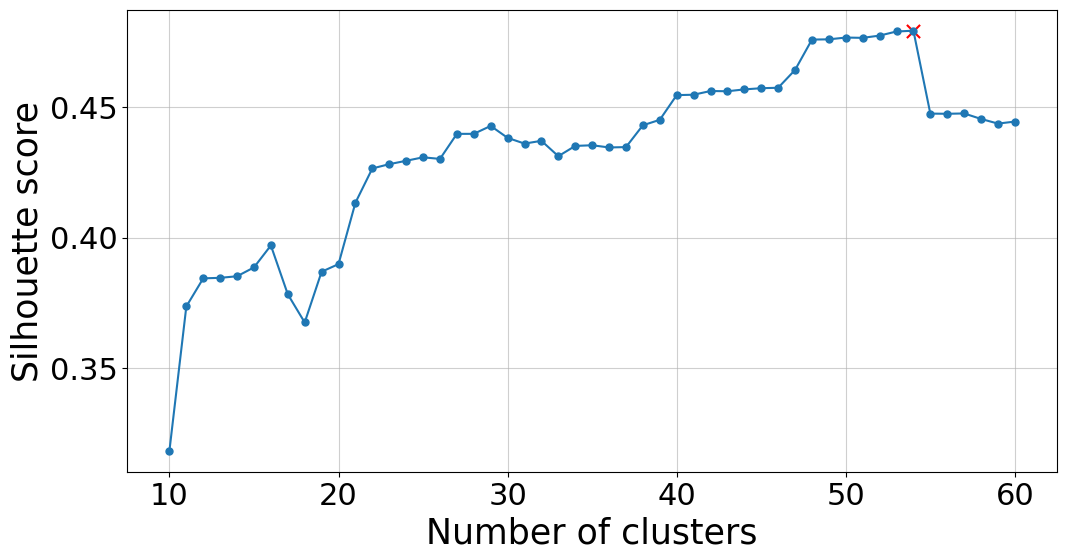

In [11]:
# Get n_clusters leading to the highest silhouette
best_sh_kmeans= np.max(shs_list_kmeans)
best_n_kmeans=n_cluster_list_kmeans[np.argmax(shs_list_kmeans)]
print("best k: ",best_n_kmeans, " with corresponding silhouette: ", best_sh_kmeans)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_list_kmeans,shs_list_kmeans, marker='o', markersize=5)
plt.scatter(best_n_kmeans, best_sh_kmeans, color='r', marker='x', s=90)
plt.grid(alpha=0.6)
plt.xlabel('Number of clusters', fontsize=25)
plt.ylabel('Silhouette score', fontsize=25)
plt.tick_params(labelsize=22)
plt.show()

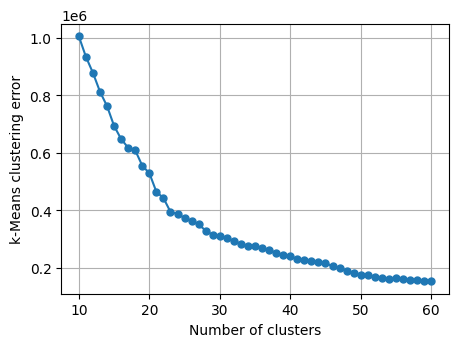

In [12]:
# Plot k-Means clustering error
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_kmeans,inertia_list_kmeans, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.show()

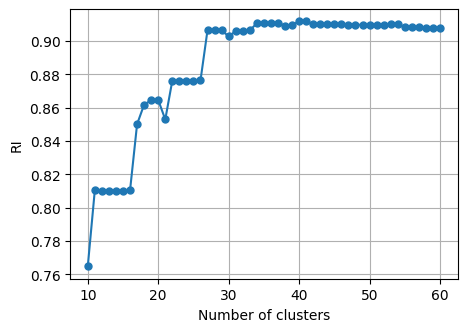

In [13]:
# Plot RI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_kmeans,ri_list_kmeans, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('RI')
plt.show()

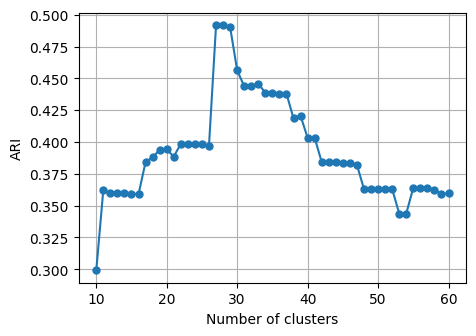

In [14]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_kmeans,ari_list_kmeans, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

best k:  54  with corresponding silhouette:  0.479189305562033


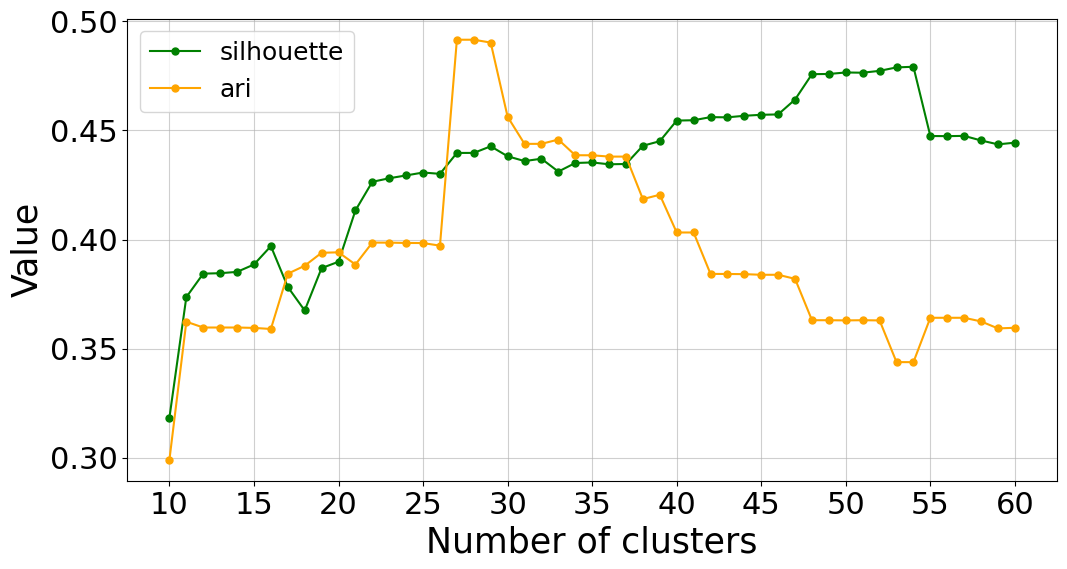

In [15]:
# Get n_clusters leading to the highest silhouette
best_sh_kmeans= np.max(shs_list_kmeans)
best_n_kmeans=n_cluster_list_kmeans[np.argmax(shs_list_kmeans)]

print("best k: ",best_n_kmeans, " with corresponding silhouette: ", best_sh_kmeans)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_list_kmeans,shs_list_kmeans, marker='o', markersize=5, label = "silhouette", color = 'green')
plt.plot(n_cluster_list_kmeans,ari_list_kmeans, marker='o', markersize=5, label = "ari", color = 'orange')
plt.grid(alpha=0.6)
plt.legend(fontsize=18)
plt.xlabel('Number of clusters', fontsize=25)
plt.xticks(range(10, 65, 5) )
plt.ylabel('Value', fontsize=25)
plt.tick_params(labelsize=22)
plt.show()

Now we will analyse more in depth the models with the best silhouette (54 clusters) and ari (28 clusters).

In [16]:
# k-means: model with highest silhouette
# k-Means with n_clusters = best_n, which is the number of labels
kmeans = KMeans(n_clusters=best_n_kmeans, random_state=11)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
kmeans_labels_best = kmeans.fit_predict(X)

# Unsupervised metric
silhouette  = silhouette_score(X, kmeans_labels_best, random_state=11)
# Supervised metrics
ri = rand_score(np.ravel(y), kmeans_labels_best)
ari = adjusted_rand_score(np.ravel(y), kmeans_labels_best)

print(f'k-Means with {best_n_kmeans} clusters')
(unique, counts)=np.unique( kmeans_labels_best, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 54 clusters
Size of each cluster:  [4822 1419 5448  397   32  470  481  446 5270   27 1426   52  189    2
  266  160 4055  908    6   38   93 4433   10  124   69  485 3635    1
  152 2443 4960   32    5 5132   21  244    6 1099  439 4451    3 2431
   62  225   25    2 1644 2032    3   65  365   42 3558   34]
k_means clustering error: 162121.78
Silhouette: 0.48
RI: 0.91
ARI: 0.34


In [17]:
best_ari_kmeans= np.max(ari_list_kmeans)
best_n_kmeans_ari=n_cluster_list_kmeans[np.argmax(ari_list_kmeans)]
# k-means: model with highest ari
# k-Means with n_clusters = best_n, which is the number of labels
kmeans = KMeans(n_clusters=best_n_kmeans_ari, random_state=11)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
kmeans_labels_best = kmeans.fit_predict(X)

# Unsupervised metric
silhouette  = silhouette_score(X, kmeans_labels_best, random_state=11)
# Supervised metrics
ri = rand_score(np.ravel(y), kmeans_labels_best)
ari = adjusted_rand_score(np.ravel(y), kmeans_labels_best)

print(f'k-Means with {best_n_kmeans_ari} clusters')
(unique, counts)=np.unique( kmeans_labels_best, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 28 clusters
Size of each cluster:  [ 9789  6449  8469  1771    42   600   511   495 10417    27  2170    52
   359     2   345   163  4082  1511     5    38   160  8882    30   124
    74   472  7199     1]
k_means clustering error: 329602.35
Silhouette: 0.44
RI: 0.91
ARI: 0.49


### PCA clusters visualization
Now we want to analyse the clusters.
Let's reduce the feature dimensionality with a 2-component PCA and get the scatter plots of the samples on the 2-components which explain the majority of variance in the data.
We will show four plots:

        1. K-Means with 12 clusters
        2. Best K-Means clusters found in the previous analysis 
        3. Best ARI K-Means clusters found in the previous analysis       
        4. Original labels


In [18]:
#running again k-Means with k=12 and best k to save the labels
kmeans = KMeans(n_clusters=best_n_kmeans, random_state=11)
kmeans_labels54 = kmeans.fit_predict(X)
kmeans = KMeans(n_clusters=best_n_kmeans_ari, random_state=11)
kmeans_labels28 = kmeans.fit_predict(X)
kmeans12 = KMeans(n_clusters=12, random_state=11)
kmeans_labels12 = kmeans12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid12_KM'] = [f'C{x:02}' for x in kmeans_labels12]
projection['cidBest_KM'] = [f'C{x:02}' for x in kmeans_labels54]
projection['cidBest_ARI_KM'] = [f'C{x:02}' for x in kmeans_labels54]
projection['label'] = y.reshape(-1)

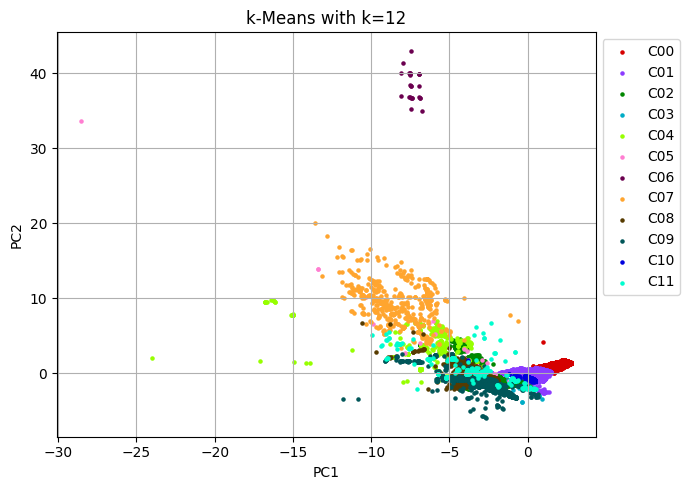

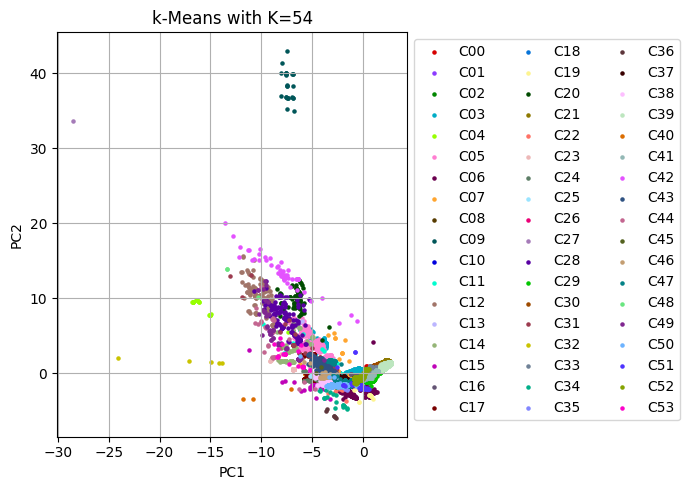

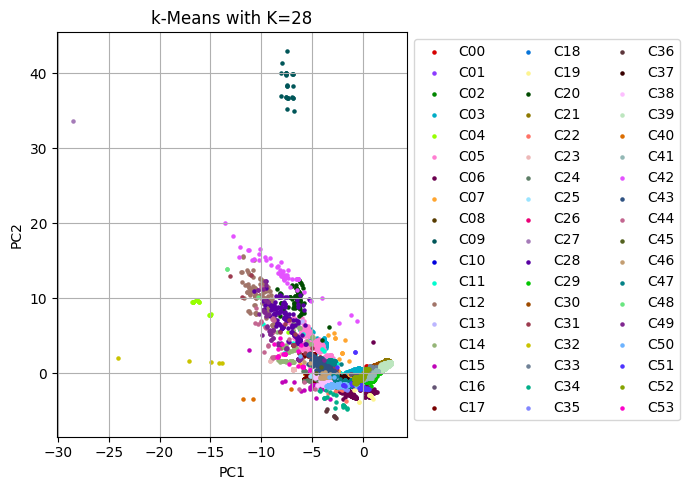

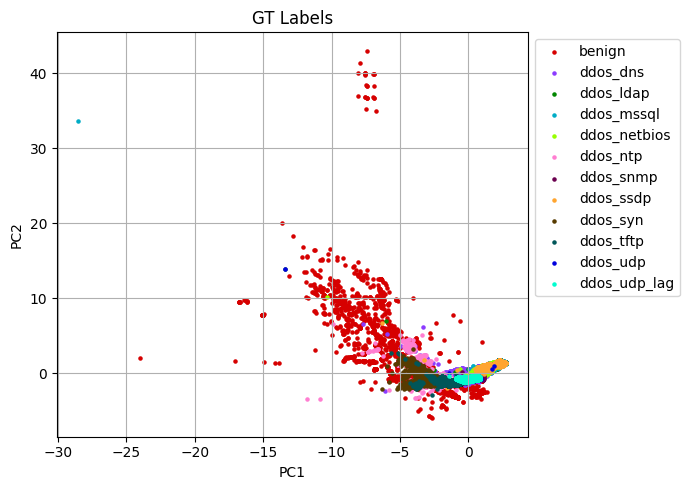

In [19]:
# First plot: k-Means with k=12
plt.figure(figsize=(7, 5))
idx=0
for i in np.unique(projection.cid12_KM):
    subdf = projection[projection.cid12_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-Means with k=12')
plt.tight_layout()
plt.show()
idx=0
# Second plot: k-Means with best k
plt.figure(figsize=(7, 5))
for i in np.unique(projection.cidBest_KM):
    subdf = projection[projection.cidBest_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'k-Means with K={best_n_kmeans}')
plt.tight_layout()
plt.show()
idx=0
# Third plot: k-Means with best k for ari
plt.figure(figsize=(7, 5))
for i in np.unique(projection.cidBest_ARI_KM):
    subdf = projection[projection.cidBest_ARI_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'k-Means with K={best_n_kmeans_ari}')
plt.tight_layout()
plt.show()
idx=0
# Fourth plot: Ground Truth (GT) Labels
plt.figure(figsize=(7, 5))
for i in np.unique(y):
    subdf = projection[projection.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GT Labels')
plt.tight_layout()
plt.show()

### t-SNE clusters visualization
Now, we want to obtain the previous results but using 2-components t-SNE, instead of 2-componens PCA.

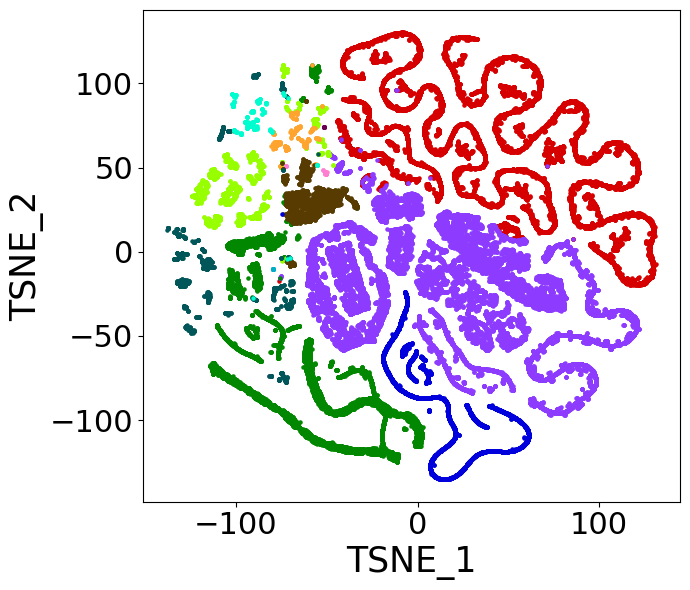

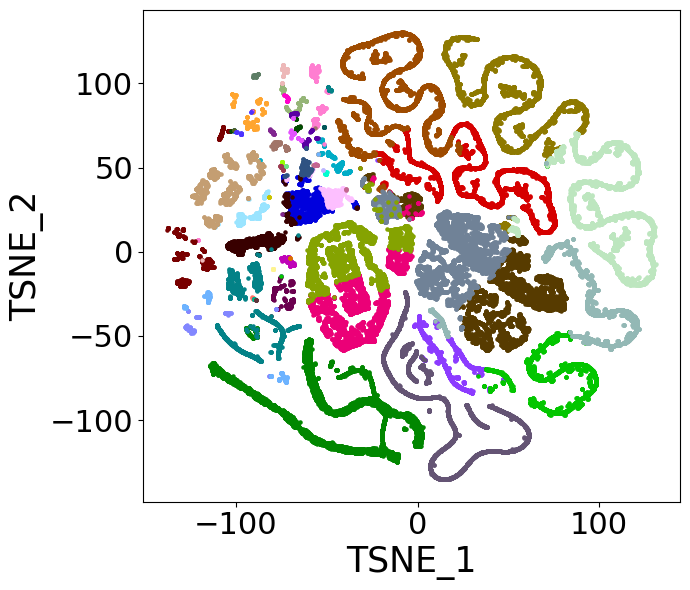

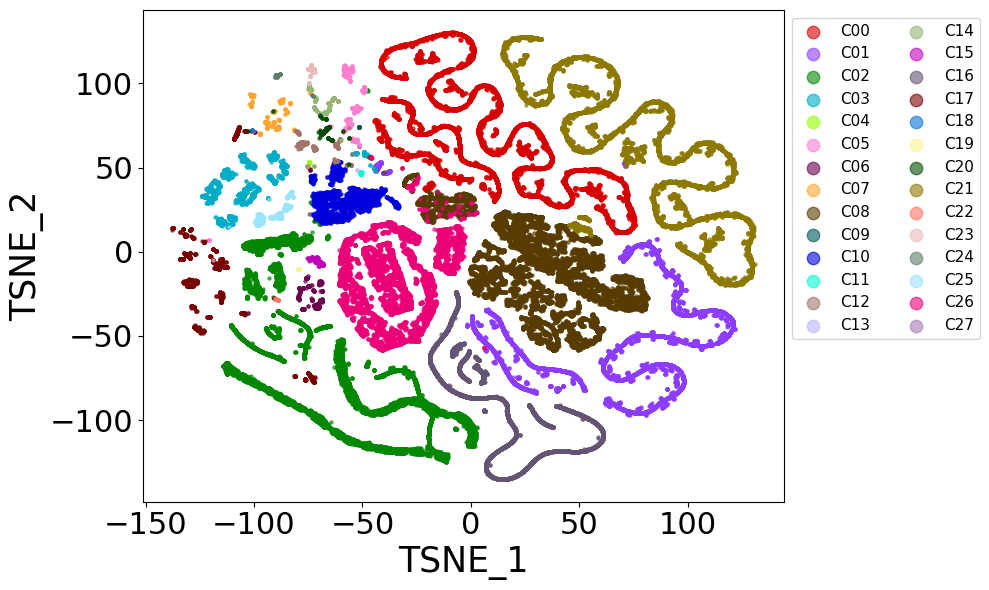

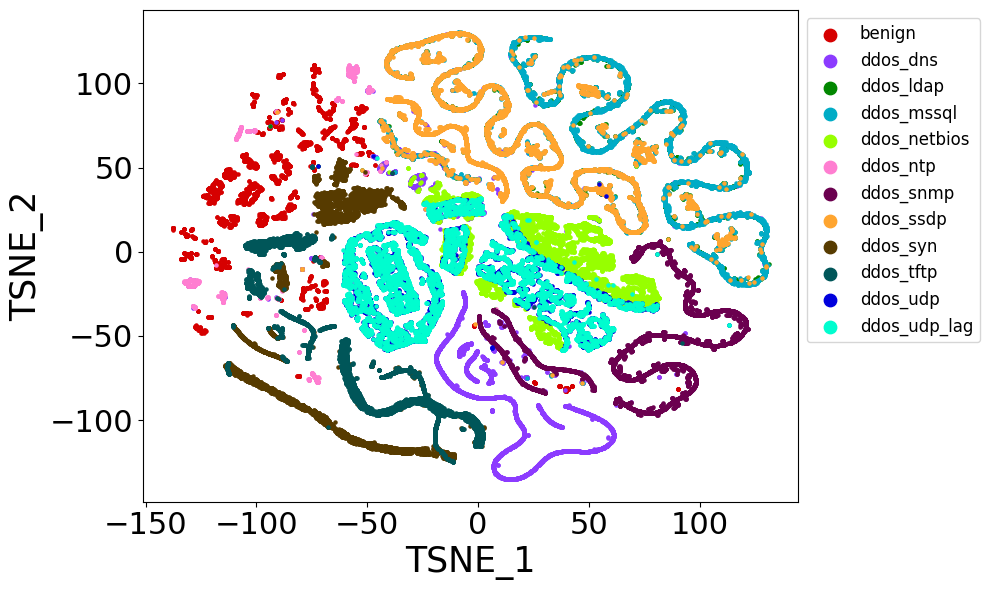

In [20]:
# Assign the cluster labels to the projection DataFrame
projection_tsne['cid12_KM'] = [f'C{x:02}' for x in kmeans_labels12]
projection_tsne['cidBest_KM'] = [f'C{x:02}' for x in kmeans_labels54]
projection_tsne['cidBest_ARI_KM'] = [f'C{x:02}' for x in kmeans_labels28]
projection_tsne['label'] = y.reshape(-1)
idx=0
# First plot: k-Means with k=12
plt.figure(figsize=(7, 6))
for i in np.unique(projection_tsne.cid12_KM):
    subdf = projection_tsne[projection_tsne.cid12_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
#plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=18, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()
idx=0
# Second plot: k-Means with best k
plt.figure(figsize=(7, 6))
for i in np.unique(projection_tsne.cidBest_KM):
    subdf = projection_tsne[projection_tsne.cidBest_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
#plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=18, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

idx=0
# Third plot: k-Means with best k for ari
plt.figure(figsize=(10, 6))
for i in np.unique(projection_tsne.cidBest_ARI_KM):
    subdf = projection_tsne[projection_tsne.cidBest_ARI_KM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx], alpha=0.6)
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", markerscale=4, fontsize=11, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

# Fourth plot: Ground Truth (GT) Labels
idx=0
plt.figure(figsize=(10, 6))
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", markerscale=4, fontsize=12, scatterpoints=1)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

#### Clusters analysis

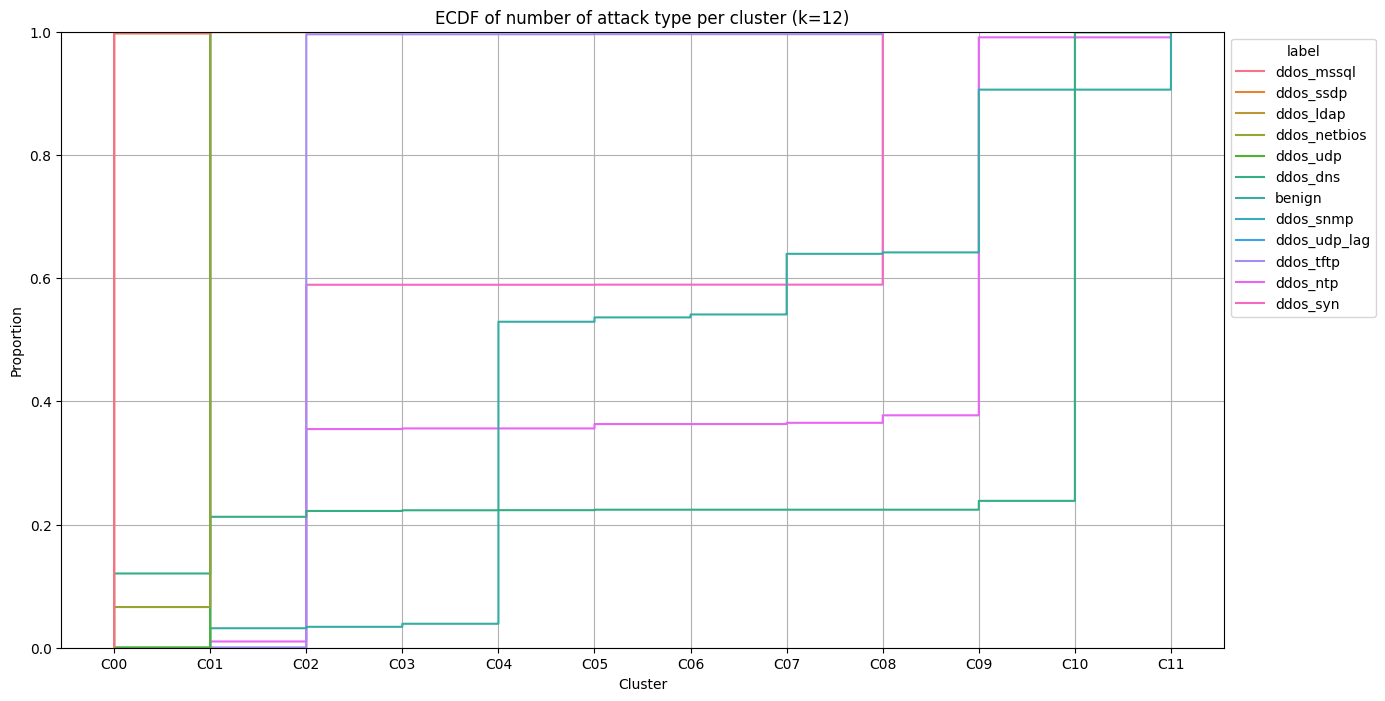

In [21]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection.sort_values('cid12_KM'), x='cid12_KM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

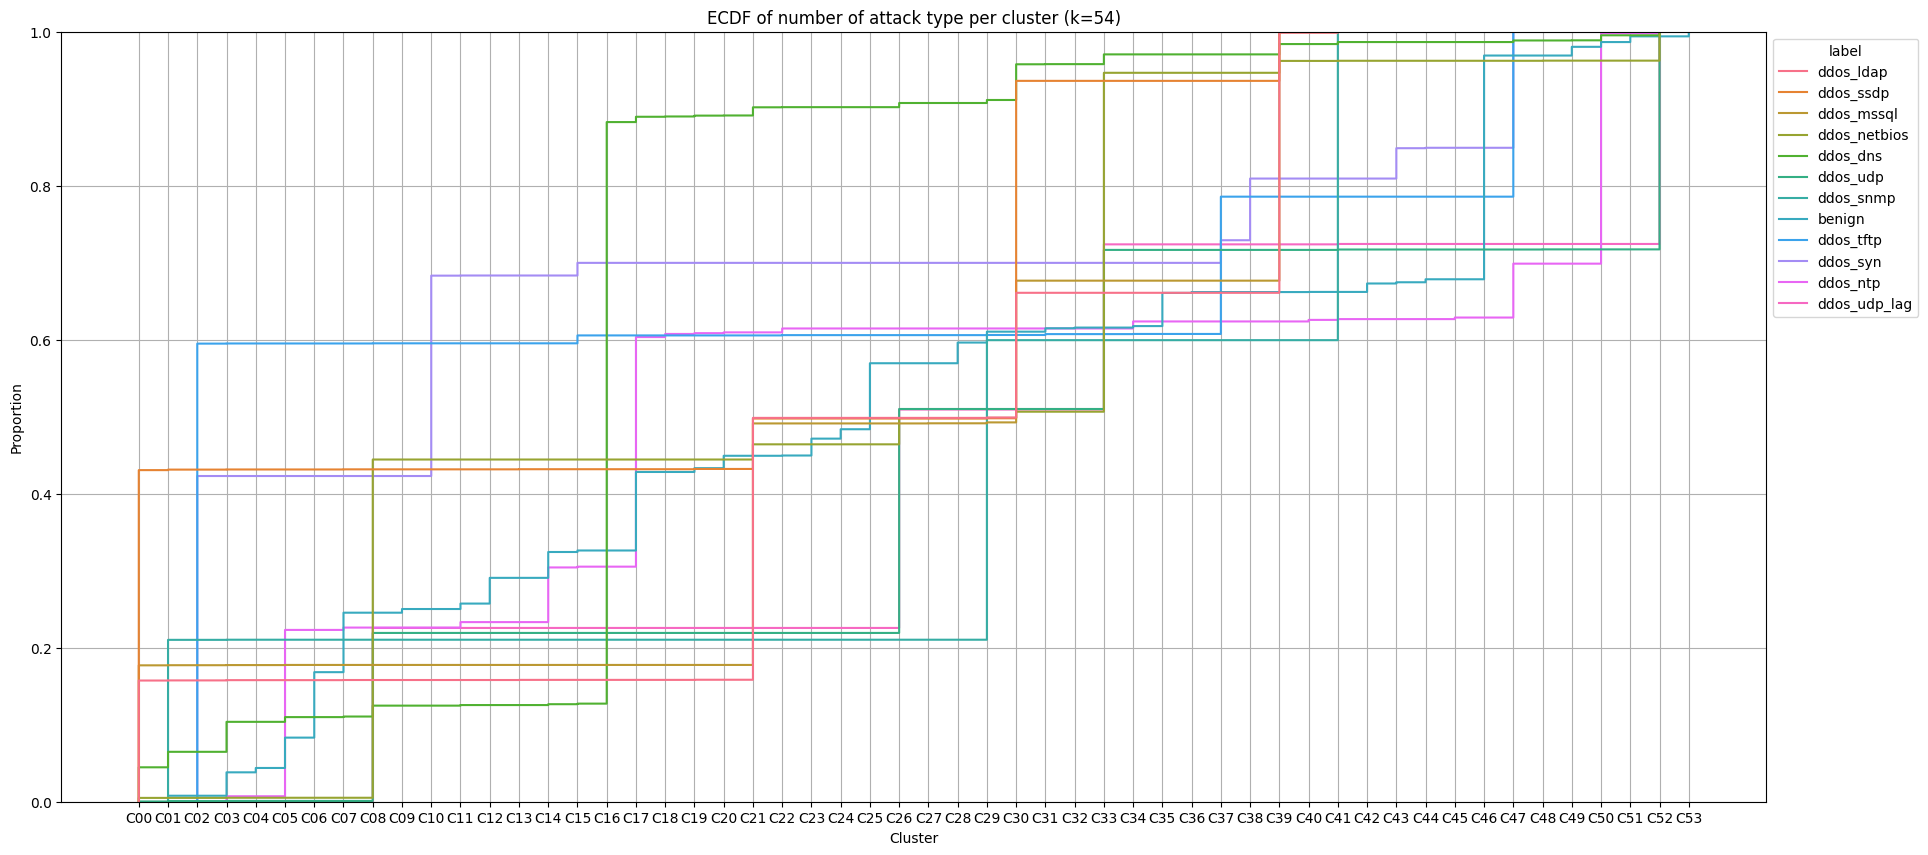

In [22]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(22, 10))
ax = sns.ecdfplot(data=projection.sort_values('cidBest_KM'), x='cidBest_KM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n_kmeans})')
plt.grid()
plt.show()

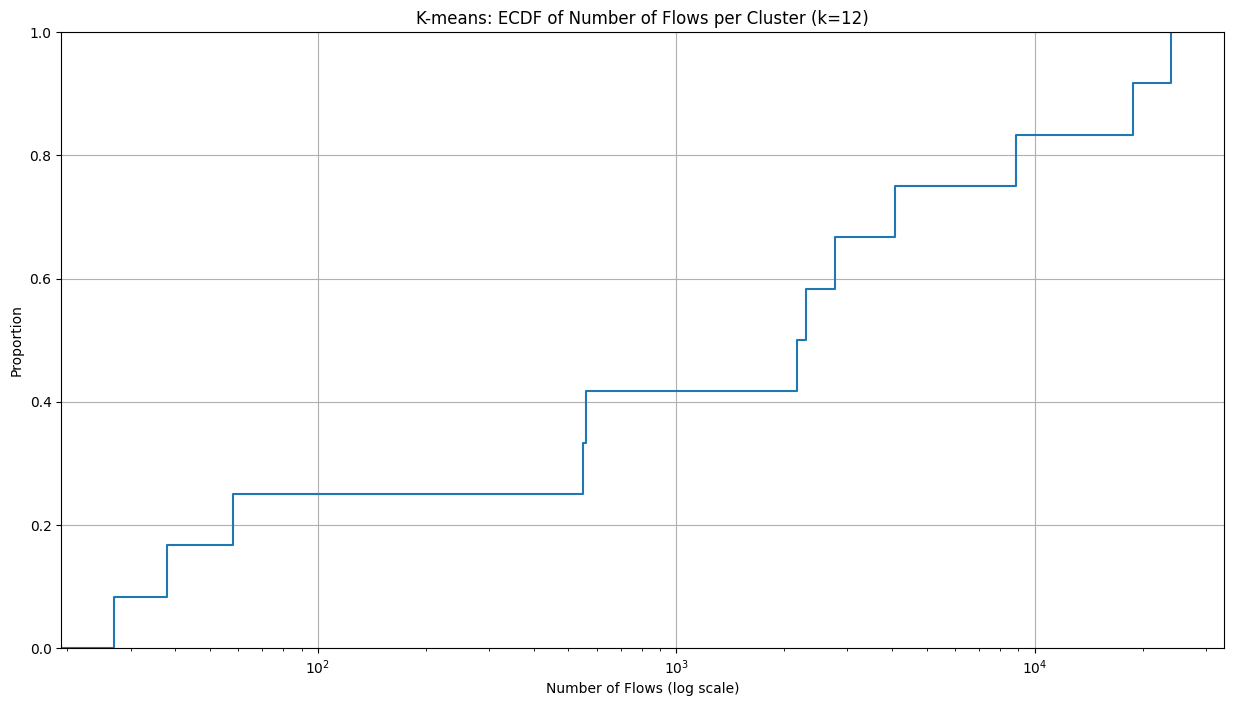

In [23]:
cluster_labels = projection.cid12_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('K-means: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

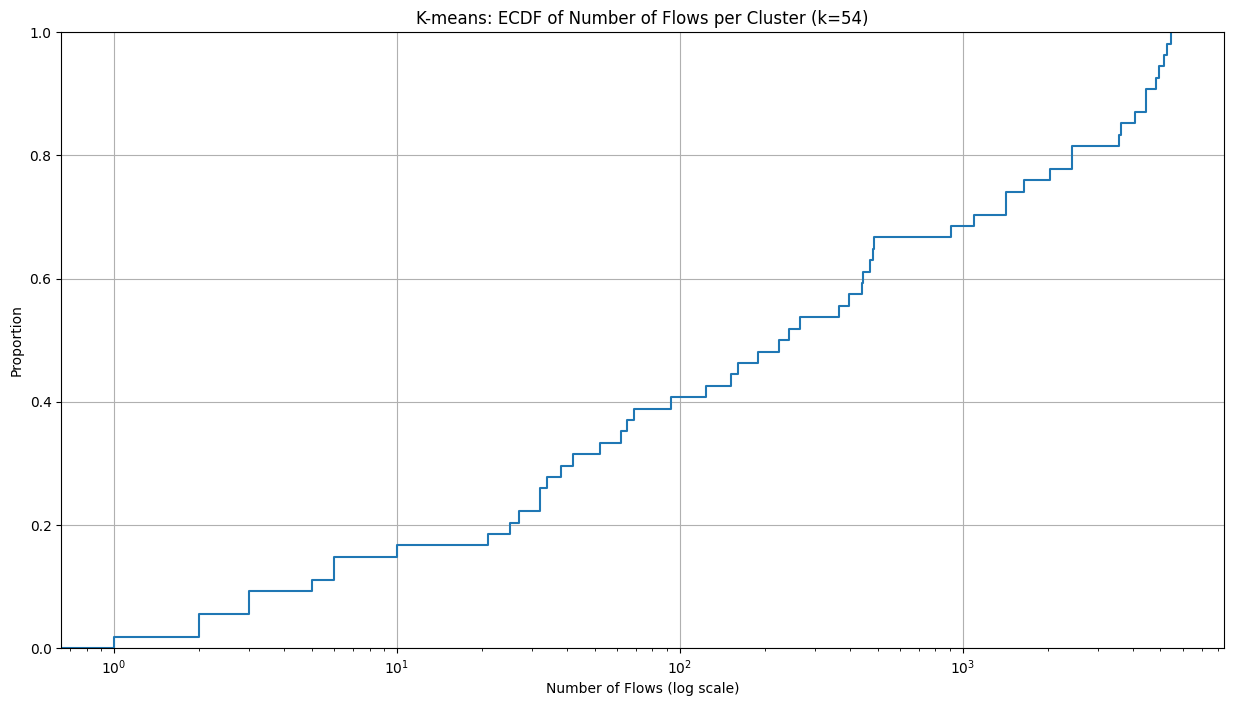

In [24]:
cluster_labels = projection.cidBest_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'K-means: ECDF of Number of Flows per Cluster (k={best_n_kmeans})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

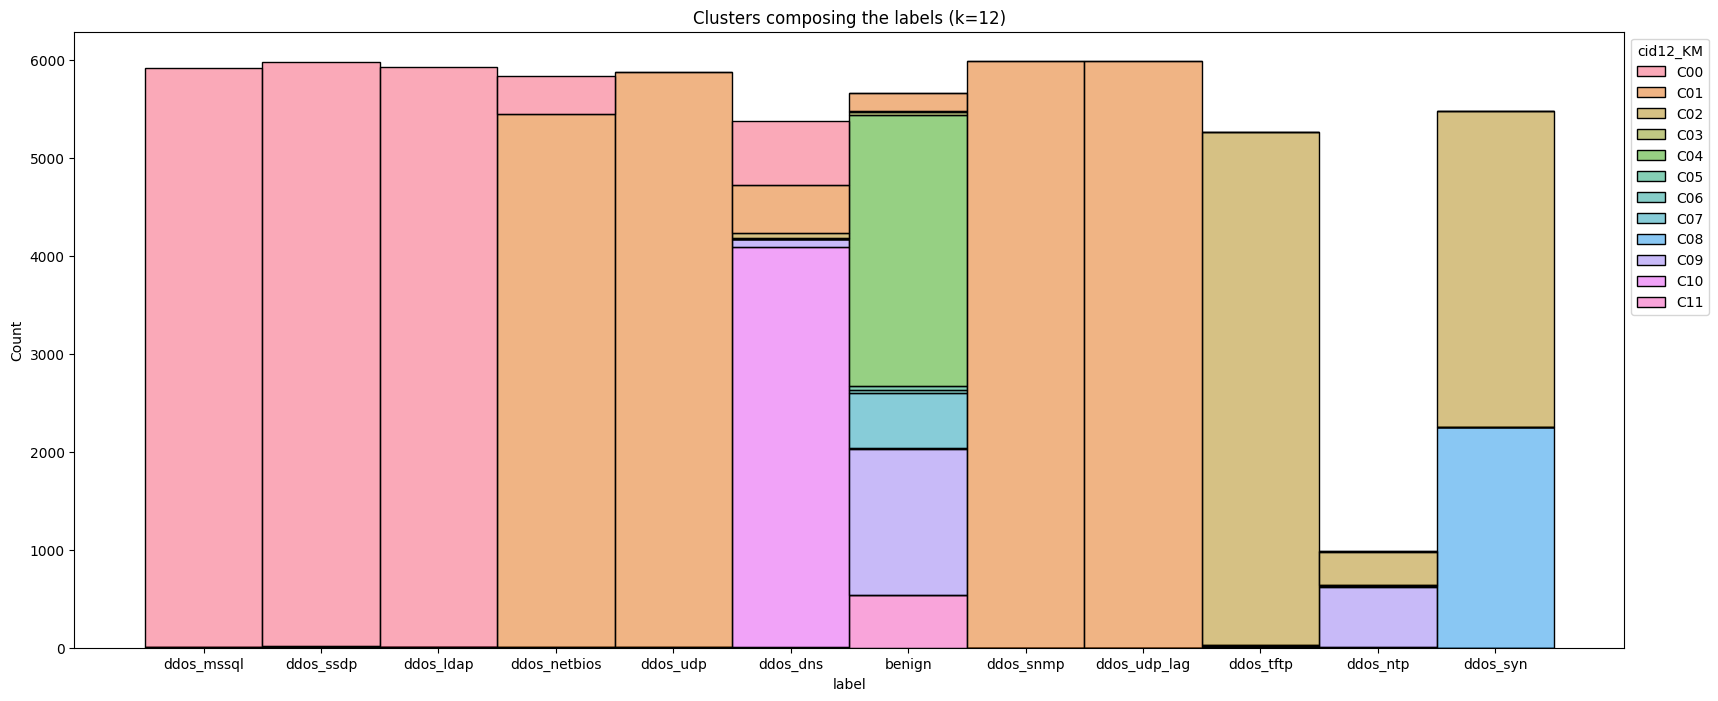

In [25]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values("cid12_KM"),
    palette="husl",
    x = "label",
    hue = "cid12_KM",
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

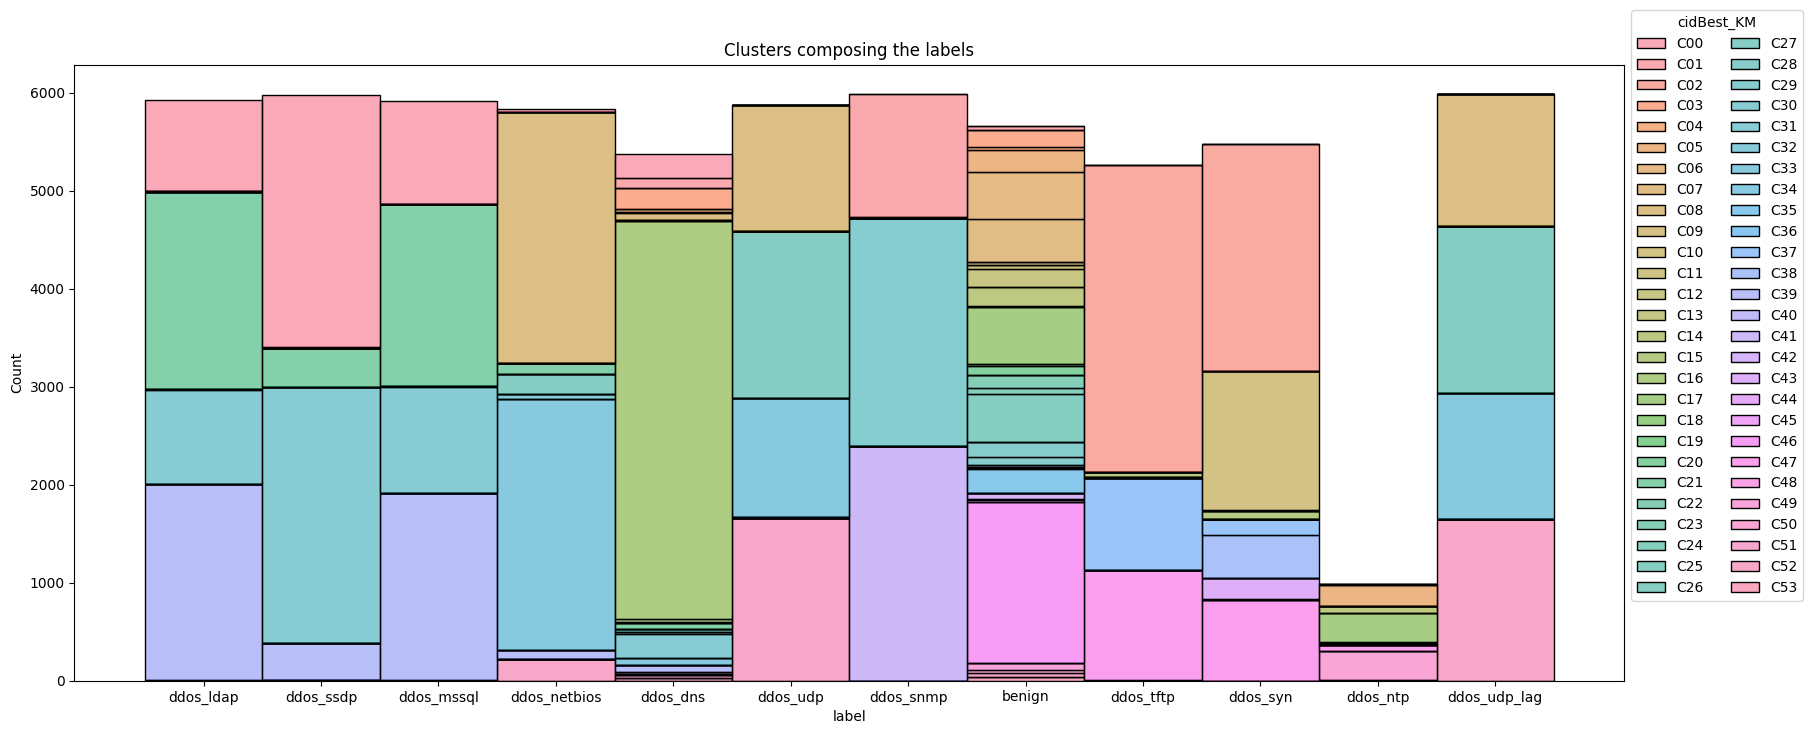

In [26]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cidBest_KM'),
    palette="husl",
    x = "label",
    hue = "cidBest_KM",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1), ncol=2)
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

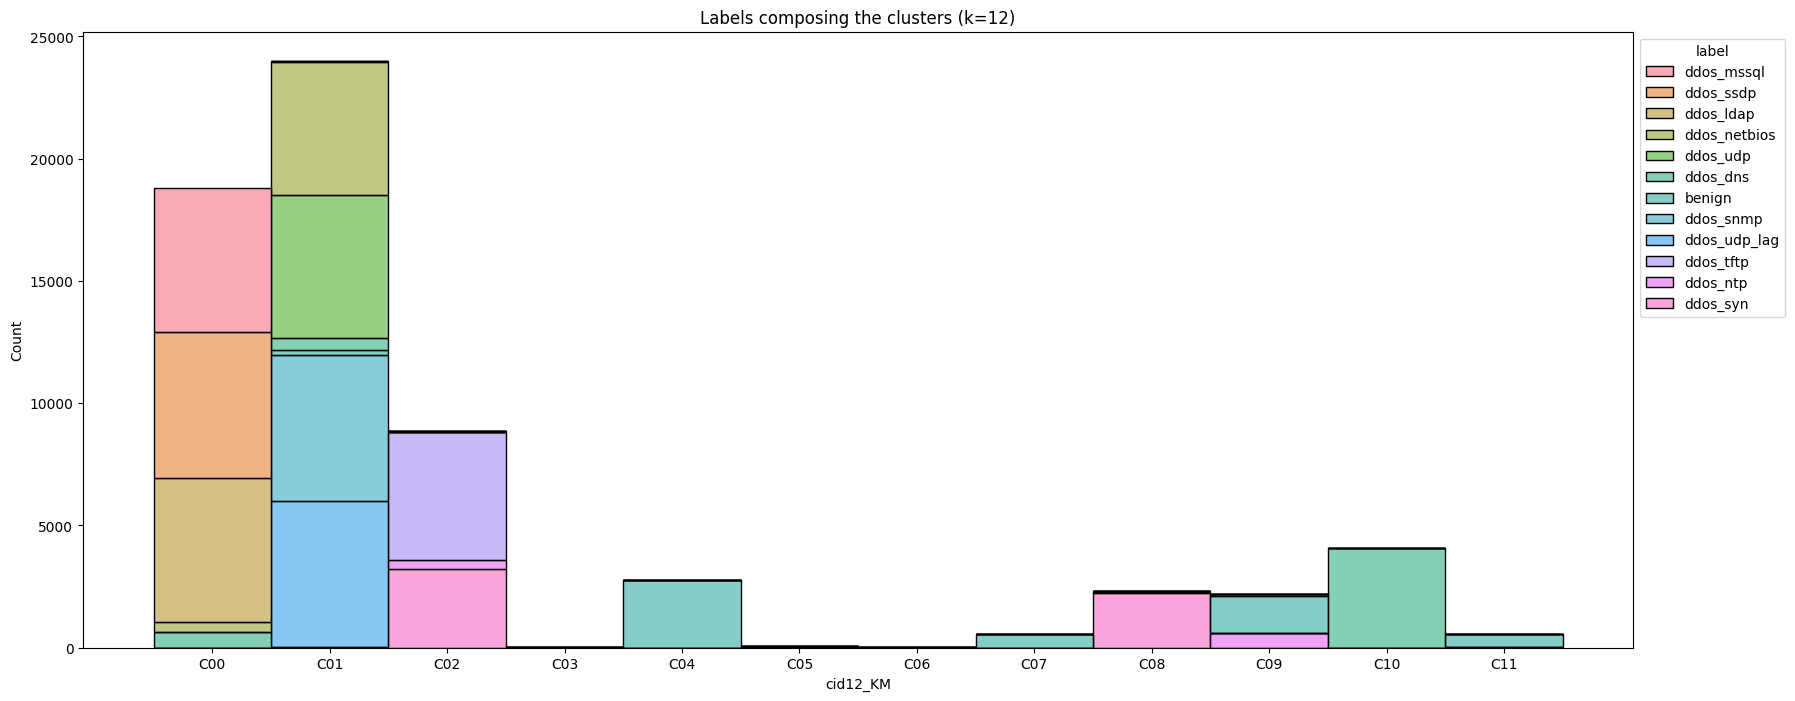

In [27]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cid12_KM'),
    palette="husl",
    x = "cid12_KM",
    hue = "label",
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

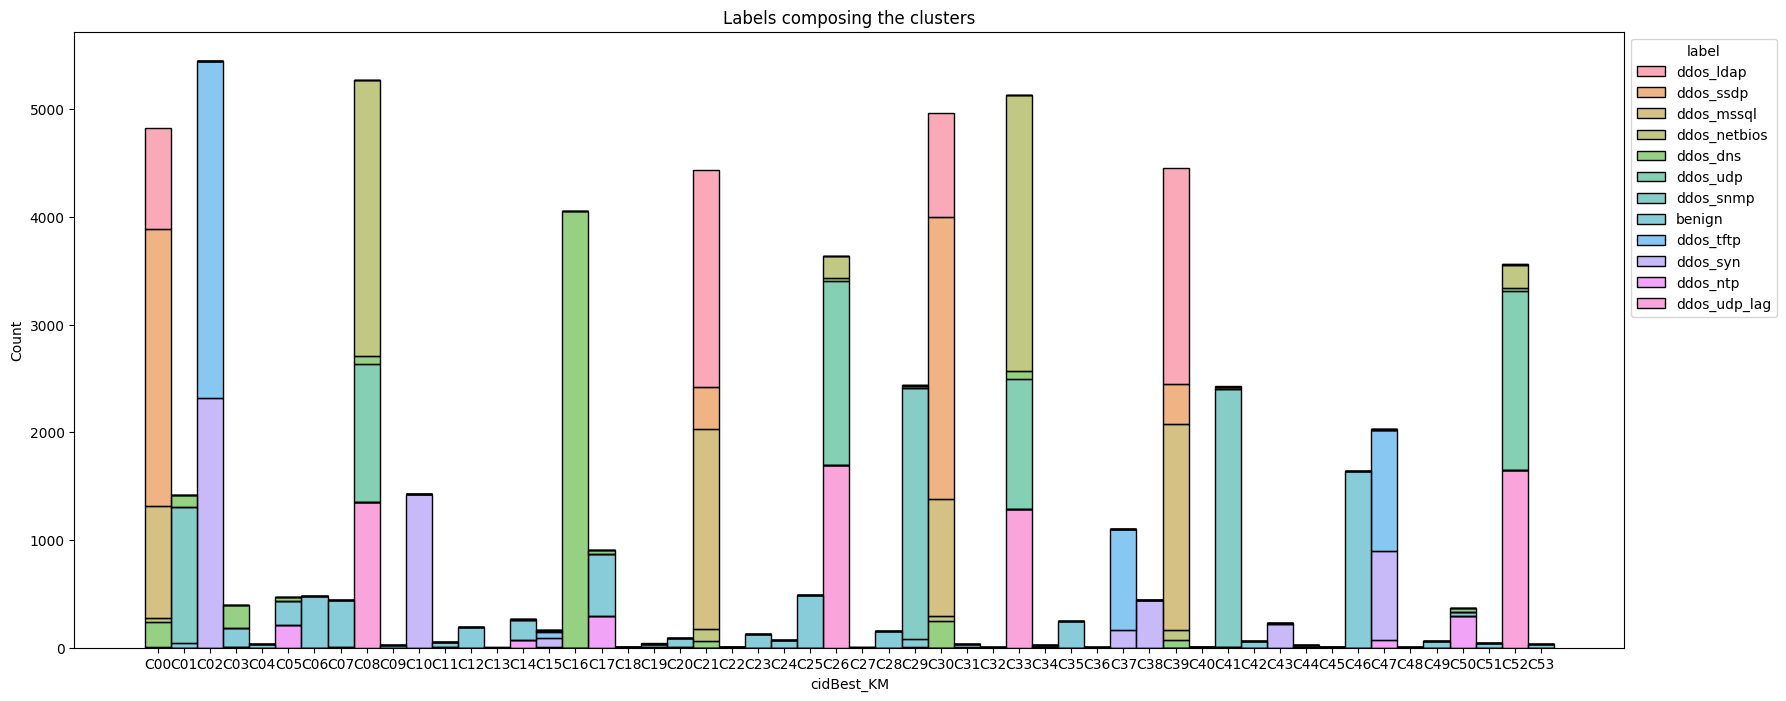

In [28]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cidBest_KM'),
    palette="husl",
    x = "cidBest_KM",
    hue = "label",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## Gaussian Mixture Model
**Gaussian mixture model (GMM)** is a **soft** clustering approach that provides the degree of beloging of each of the m observatios to k different clusters. Each cluster is represented by a gaussian distribution.  
Useful links: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">GMM in sklearn</a>.

``n_components`` indicates the number of clusters to use.
``init_params`` indicates the method used to initialize the weights, the means and the precisions.

In [29]:
# GMM
# GMM with n_components=12 - which is the number of labels
gmm= GaussianMixture(n_components = 12, random_state=11)
cl_gmm_labels12 = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels12, random_state=11)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels12)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels12)

print('GMM with 12 clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

GMM with 12 clusters
Effetive size of each cluster:  [0.29189333 0.37154797 0.12943847 0.00059154 0.03794538 0.00090288
 0.00042031 0.01859348 0.03656658 0.03668786 0.06357509 0.01183711]
GMM total log-likelihood score:, 121.97
Silhouette: 0.38
RI: 0.81
ARI: 0.36


The results obtained are similar to the ones of K-Means with default parameters. Now we perform the hyper-parameter tuning in order to find the number of components that maximize the silhouette and the ARI.

In [30]:
n_cluster_list_gmm=[]
shs_list_gmm = []
ri_list_gmm = []
ari_list_gmm = []
log_l_list_gmm=[]

for n_clusters in range(10, 46):
    gmm = GaussianMixture(n_components=n_clusters, random_state=11)
    cl_gmm_labels = gmm.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_gmm_labels, random_state=11)
    n_cluster_list_gmm.append(n_clusters)
    shs_list_gmm.append(silhouette)
    ri_list_gmm.append(rand_score(np.ravel(y), cl_gmm_labels))
    ari_list_gmm.append(adjusted_rand_score(np.ravel(y), cl_gmm_labels))
    log_l_list_gmm.append(gmm.score(X))

    print(f"{n_clusters} clusters: GMM total log-likelihood score: {round(gmm.score(X), 2)}, silhouette {round(silhouette, 2)}, ari {adjusted_rand_score(np.ravel(y), cl_gmm_labels)}")

10 clusters: GMM total log-likelihood score: 119.87, silhouette 0.29, ari 0.19722027752259336
11 clusters: GMM total log-likelihood score: 119.01, silhouette 0.38, ari 0.36648801689879984
12 clusters: GMM total log-likelihood score: 121.97, silhouette 0.38, ari 0.3641153149451381
13 clusters: GMM total log-likelihood score: 121.98, silhouette 0.38, ari 0.36411544499072523
14 clusters: GMM total log-likelihood score: 118.77, silhouette 0.39, ari 0.365187406848102
15 clusters: GMM total log-likelihood score: 120.67, silhouette 0.39, ari 0.35575217448143337
16 clusters: GMM total log-likelihood score: 121.44, silhouette 0.39, ari 0.3542397417305419
17 clusters: GMM total log-likelihood score: 123.49, silhouette 0.36, ari 0.3805333581169427
18 clusters: GMM total log-likelihood score: 127.39, silhouette 0.27, ari 0.2787485742826309
19 clusters: GMM total log-likelihood score: 132.58, silhouette 0.27, ari 0.2813209160235843
20 clusters: GMM total log-likelihood score: 133.01, silhouette 0.2

best k:  39  with corresponding silhouette:  0.40583611360130123


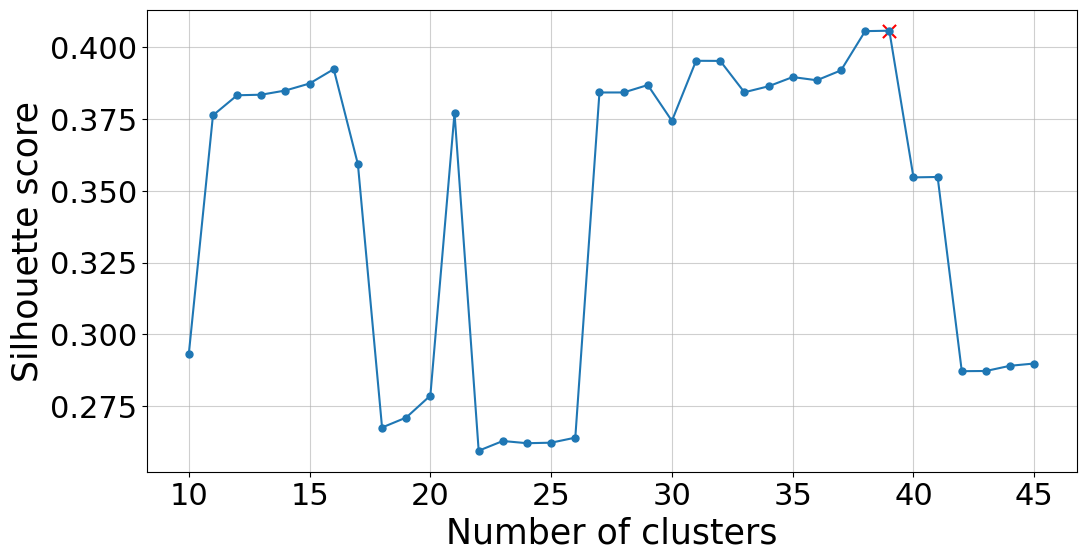

In [31]:
# Get n_clusters leading to the highest silhouette
best_sh_gmm= np.max(shs_list_gmm)
best_n_gmm=n_cluster_list_gmm[np.argmax(shs_list_gmm)]
print("best k: ",best_n_gmm, " with corresponding silhouette: ", best_sh_gmm)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_list_gmm,shs_list_gmm, marker='o', markersize=5)
plt.scatter(best_n_gmm, best_sh_gmm, color='r', marker='x', s=90)
plt.grid(alpha=0.6)
plt.xlabel('Number of clusters', fontsize=25)
plt.ylabel('Silhouette score', fontsize=25)
plt.tick_params(labelsize=22)
plt.show()

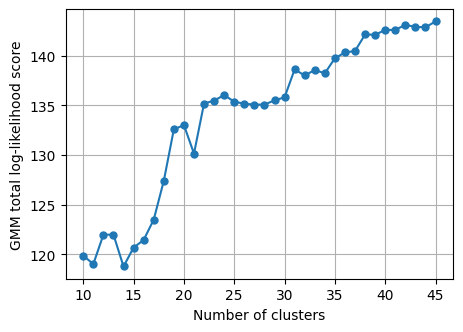

In [32]:
# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_gmm,log_l_list_gmm, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

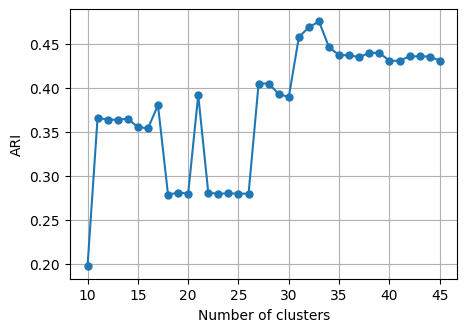

In [33]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list_gmm,ari_list_gmm, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

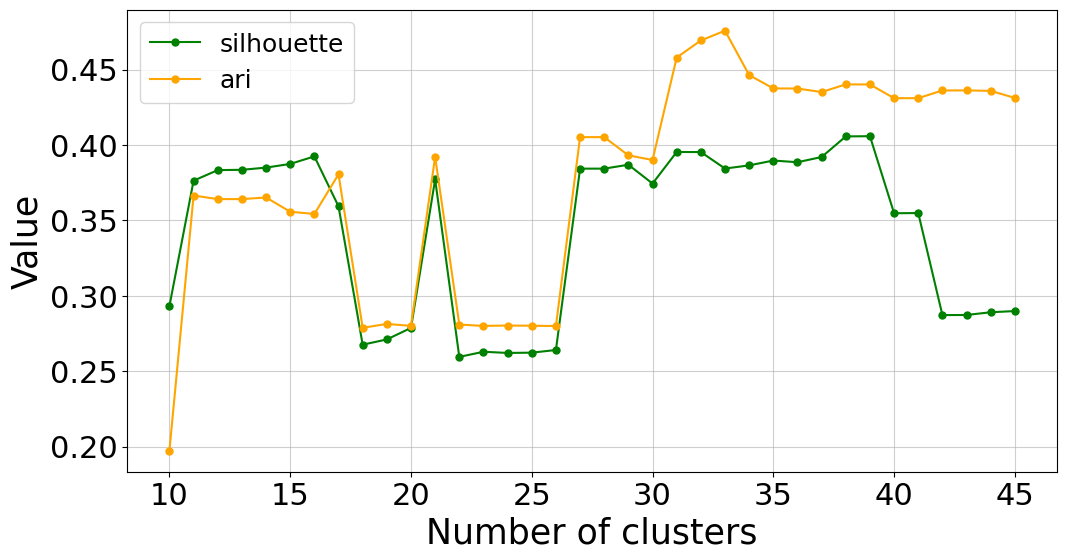

In [34]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(n_cluster_list_gmm,shs_list_gmm, marker='o', markersize=5, label='silhouette', color='green')
plt.plot(n_cluster_list_gmm,ari_list_gmm, marker='o', markersize=5, label='ari', color='orange')
plt.grid(alpha=0.6)
plt.legend(fontsize=18)
plt.xlabel('Number of clusters', fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.tick_params(labelsize=22)
plt.show()

Now, we will examine the GMM with the best parameter ``n_components``, maximizing silhouette and ari.

In [35]:
# GMM
# GMM with n_components=best_n
gmm = GaussianMixture(n_components = best_n_gmm, random_state=11)
cl_gmm_labels = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels, random_state=11)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels)

print(f'GMM with {best_n_gmm} clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

GMM with 39 clusters
Effetive size of each cluster:  [1.41821702e-01 4.65806614e-03 1.02585656e-01 4.77902832e-03
 5.29273494e-04 9.83826023e-03 5.51067109e-03 6.83385207e-03
 1.49284486e-01 4.20305422e-04 3.49009169e-02 8.25043976e-04
 3.67378073e-03 3.11337350e-05 4.70017163e-03 2.83316959e-03
 6.35595199e-02 1.41035819e-02 2.17936145e-04 5.91540964e-04
 8.40601825e-04 1.30337558e-01 1.30294681e-02 1.93029157e-03
 1.15194819e-03 3.29083581e-02 9.31365681e-02 1.55668675e-05
 4.65552751e-03 6.40715282e-02 7.95700578e-03 5.44840362e-04
 7.78343374e-05 7.04494893e-02 3.26904217e-04 1.21888572e-02
 9.34012049e-05 1.43993526e-02 1.86802410e-04]
GMM total log-likelihood score:, 142.1
Silhouette: 0.41
RI: 0.91
ARI: 0.44


In [36]:
best_ari_gmm= np.max(ari_list_gmm)
best_n_gmm_ari=n_cluster_list_gmm[np.argmax(ari_list_gmm)]
# GMM
# GMM with n_components=best_n_ari (max ari obtained)
gmm = GaussianMixture(n_components = best_n_gmm_ari, random_state=11)
cl_gmm_labels_ari = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels_ari, random_state=11)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels_ari)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels_ari)

print(f'GMM with {best_n_gmm_ari} clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

GMM with 33 clusters
Effetive size of each cluster:  [1.41491424e-01 8.06219067e-02 1.29060195e-01 4.04737130e-03
 5.29273494e-04 9.35568735e-03 9.64395112e-03 7.05179079e-03
 1.60888712e-01 4.20305422e-04 3.53414921e-02 8.25043976e-04
 3.67378073e-03 3.11337350e-05 4.68561484e-03 2.83316963e-03
 6.35595199e-02 2.08670292e-02 2.17936145e-04 5.91540964e-04
 9.18440094e-04 1.30353032e-01 3.62716013e-03 1.93029157e-03
 1.15194819e-03 3.29083581e-02 1.04056757e-01 1.55668675e-05
 4.48328954e-03 4.34152902e-03 3.98540741e-02 5.44840362e-04
 7.78343374e-05]
GMM total log-likelihood score:, 138.55
Silhouette: 0.38
RI: 0.91
ARI: 0.48


### PCA clusters visualization

In [37]:
# We reuse the same PCA as before
#running again GMM with k=12 and best k to save the labels
gmm = GaussianMixture(n_components=best_n_gmm, random_state=11)
gmm_labels39 = gmm.fit_predict(X)
gmm = GaussianMixture(n_components=best_n_gmm_ari, random_state=11)
gmm_labels33 = gmm.fit_predict(X)
gmm12 = GaussianMixture(n_components=12, random_state=11)
gmm_labels12 = gmm12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid12_GMM'] = [f'C{x:02}' for x in gmm_labels12]
projection['cidBest_GMM'] = [f'C{x:02}' for x in gmm_labels39]
projection['cidBest_ARI_GMM'] = [f'C{x:02}' for x in gmm_labels33]
projection['label'] = y.reshape(-1)

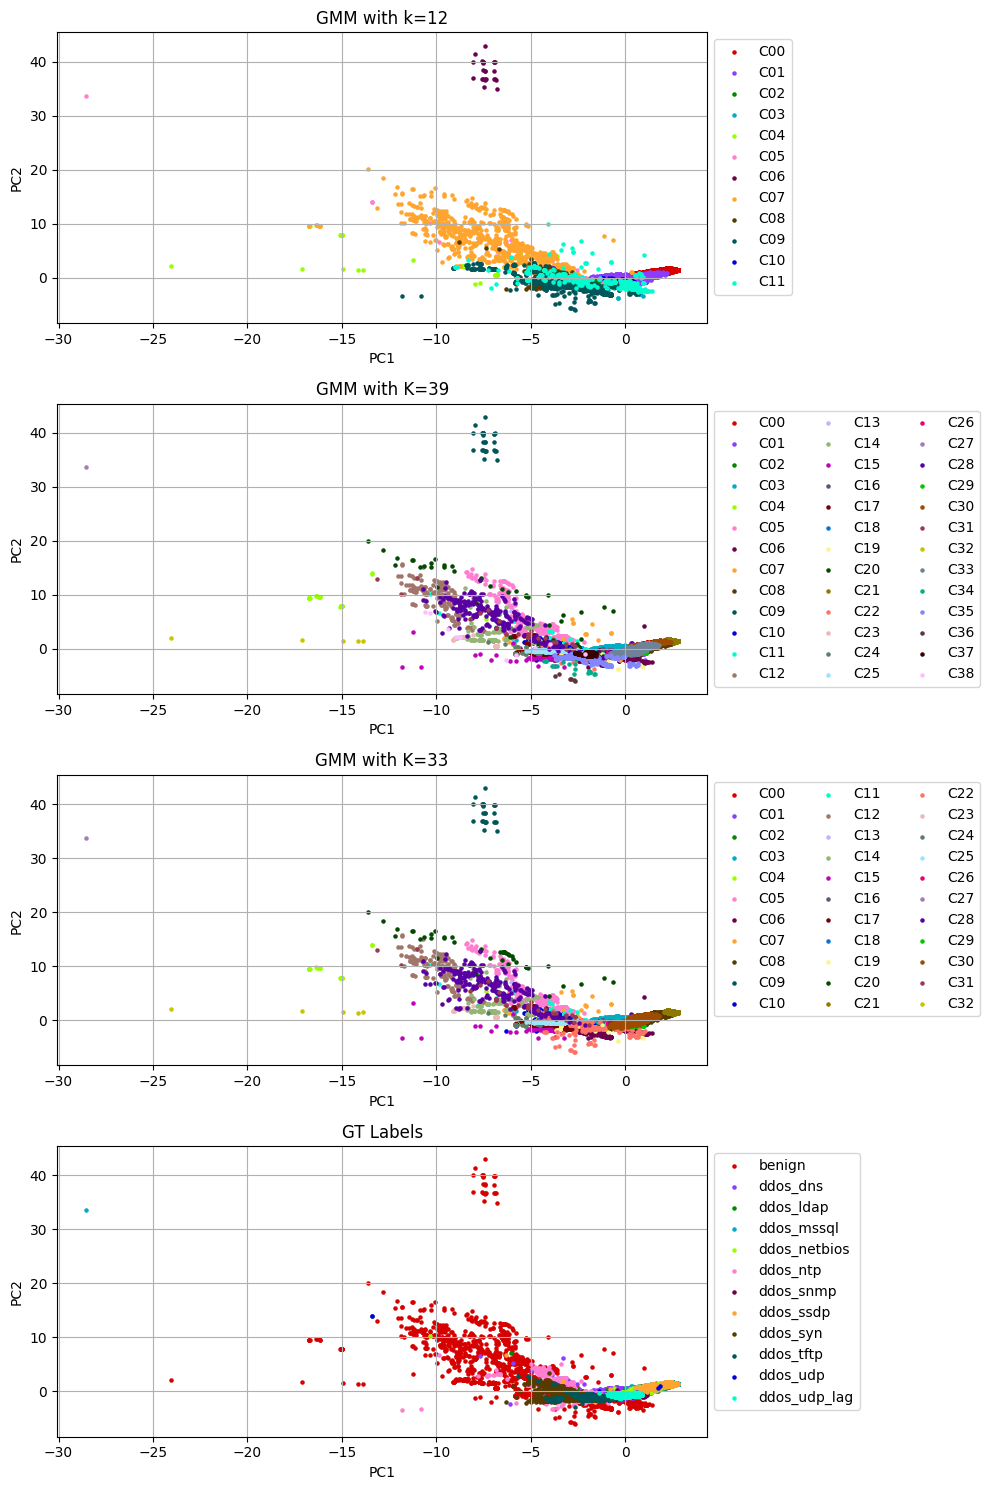

In [38]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Each cluster is plotter separately with a unique color
idx = 0
for i in np.unique(projection.cid12_GMM):
    subdf = projection[projection.cid12_GMM==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('GMM with k=12')

idx=0
for i in np.unique(projection.cidBest_GMM):
    subdf = projection[projection.cidBest_GMM==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx +=1
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title(f'GMM with K={best_n_gmm}')

idx=0
for i in np.unique(projection.cidBest_ARI_GMM):
    subdf = projection[projection.cidBest_ARI_GMM==i]
    axs[2].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx +=1
axs[2].grid()
lgnd = axs[2].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)

axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title(f'GMM with K={best_n_gmm_ari}')

idx = 0
for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[3].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
axs[3].grid()
lgnd = axs[3].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[3].set_xlabel('PC1')
axs[3].set_ylabel('PC2')
axs[3].set_title('GT Labels')


plt.tight_layout() #Ensures that the subplots do not overlap and fit neatly within the figure
plt.show()

### t-SNE clusters visualization

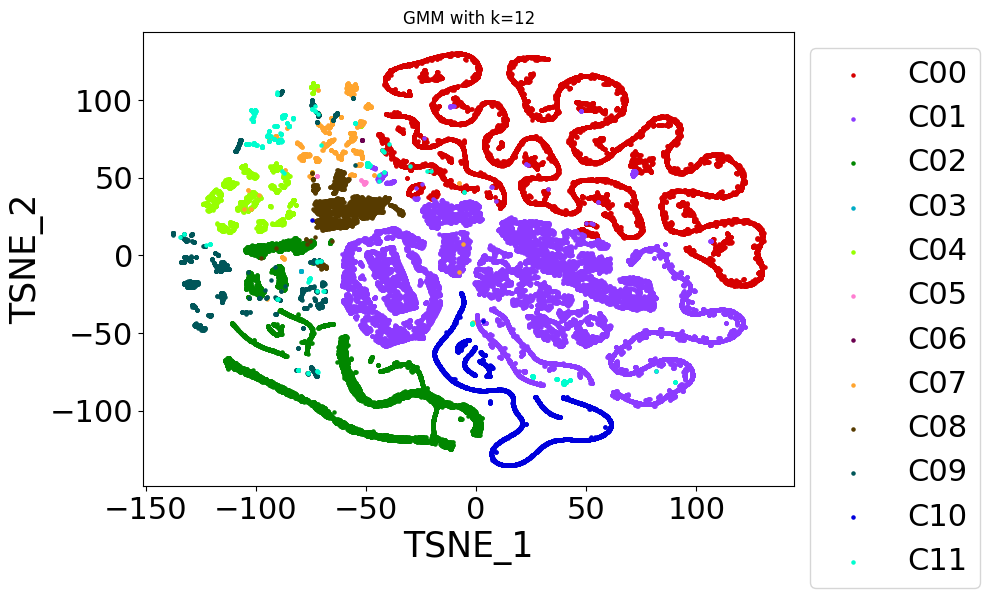

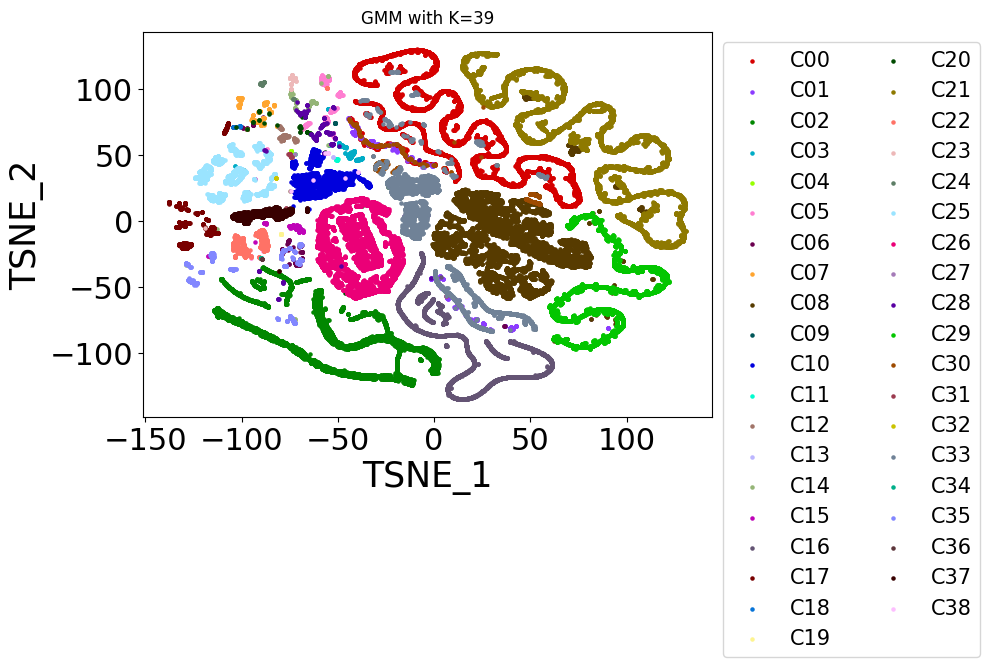

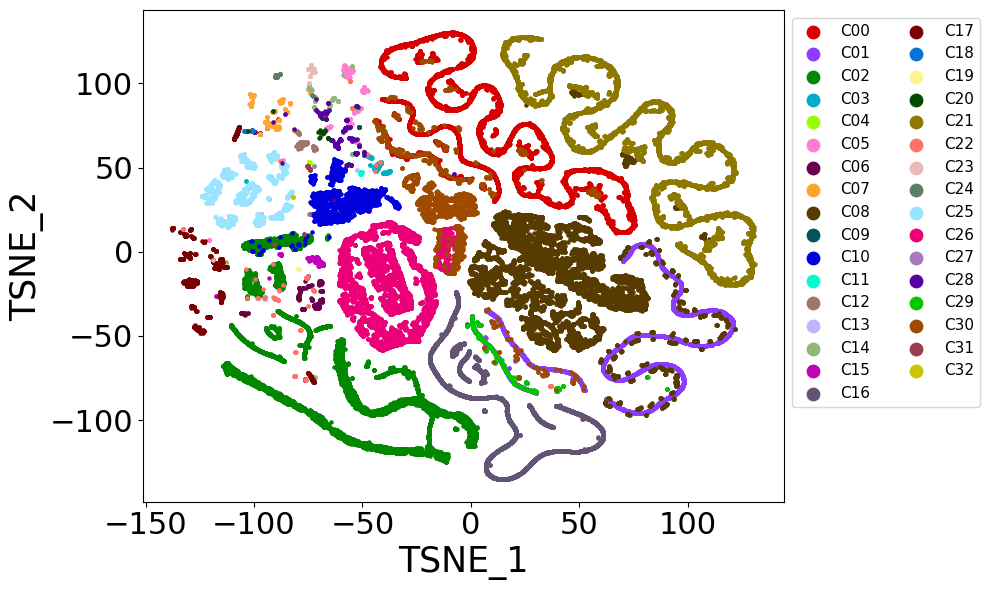

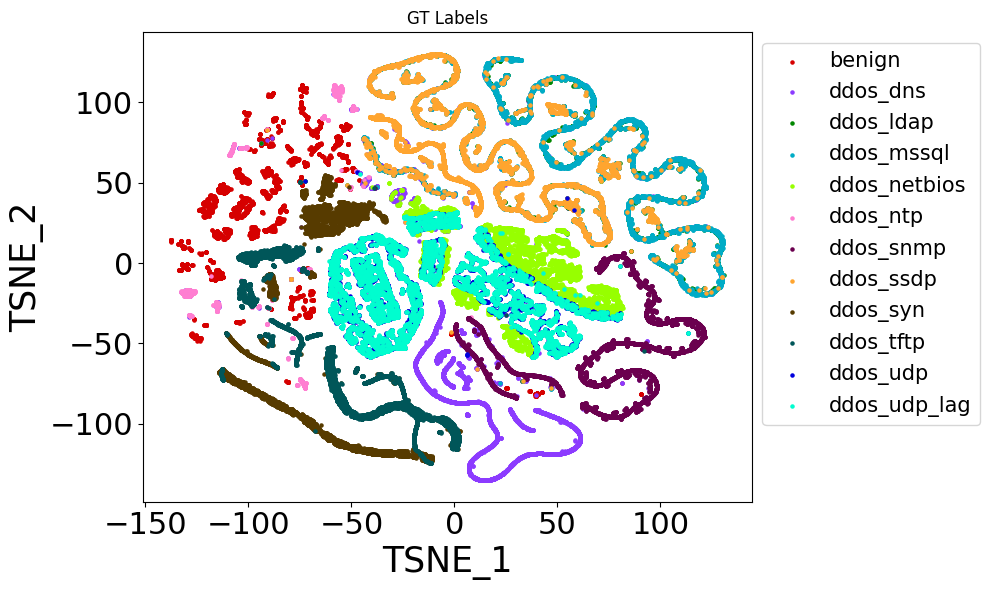

In [39]:
# Assign the cluster labels to the projection DataFrame
projection_tsne['cid12_GMM'] = [f'C{x:02}' for x in gmm_labels12]
projection_tsne['cidBest_GMM'] = [f'C{x:02}' for x in gmm_labels39]
projection_tsne['cidBest_ARI_GMM'] = [f'C{x:02}' for x in gmm_labels33]
projection_tsne['label'] = y.reshape(-1)

# First plot: GMM with k=12
idx = 0
plt.figure(figsize=(10, 6))
for i in np.unique(projection_tsne.cid12_GMM):
    subdf = projection_tsne[projection_tsne.cid12_GMM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=22)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.title('GMM with k=12')
plt.tight_layout()
plt.show()

# Second plot: GMM with best k
idx = 0
plt.figure(figsize=(10, 6))
for i in np.unique(projection_tsne.cidBest_GMM):
    subdf = projection_tsne[projection_tsne.cidBest_GMM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=15, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.title(f'GMM with K={best_n_gmm}')
plt.tight_layout()
plt.show()

# Third plot: GMM with best k for ARI
idx = 0
plt.figure(figsize=(10, 6))
for i in np.unique(projection_tsne.cidBest_ARI_GMM):
    subdf = projection_tsne[projection_tsne.cidBest_ARI_GMM == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=11, markerscale=4, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

# Fourth plot: Ground Truth (GT) Labels
plt.figure(figsize=(10, 6))
idx=0
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=15, ncol=1)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
plt.title('GT Labels')
plt.tight_layout()
plt.show()

### Clusters analysis

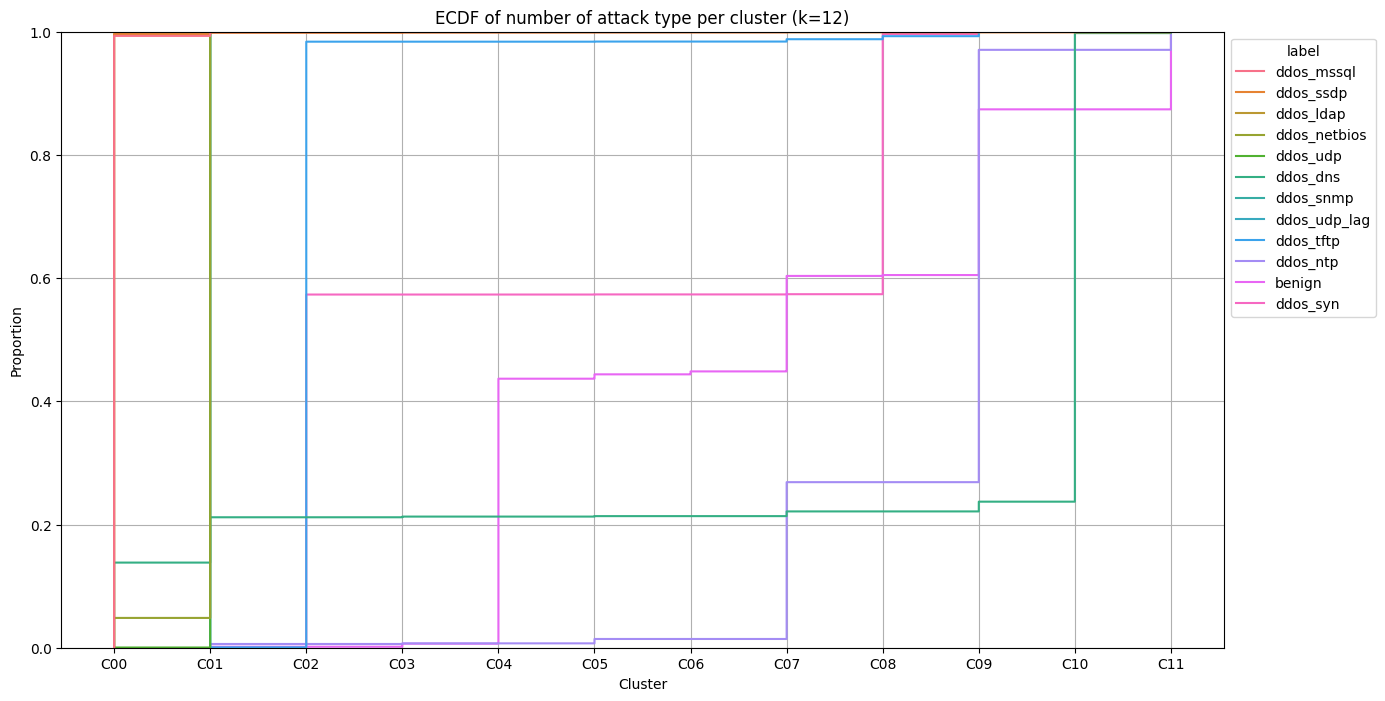

In [40]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection.sort_values('cid12_GMM'), x='cid12_GMM', hue='label')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

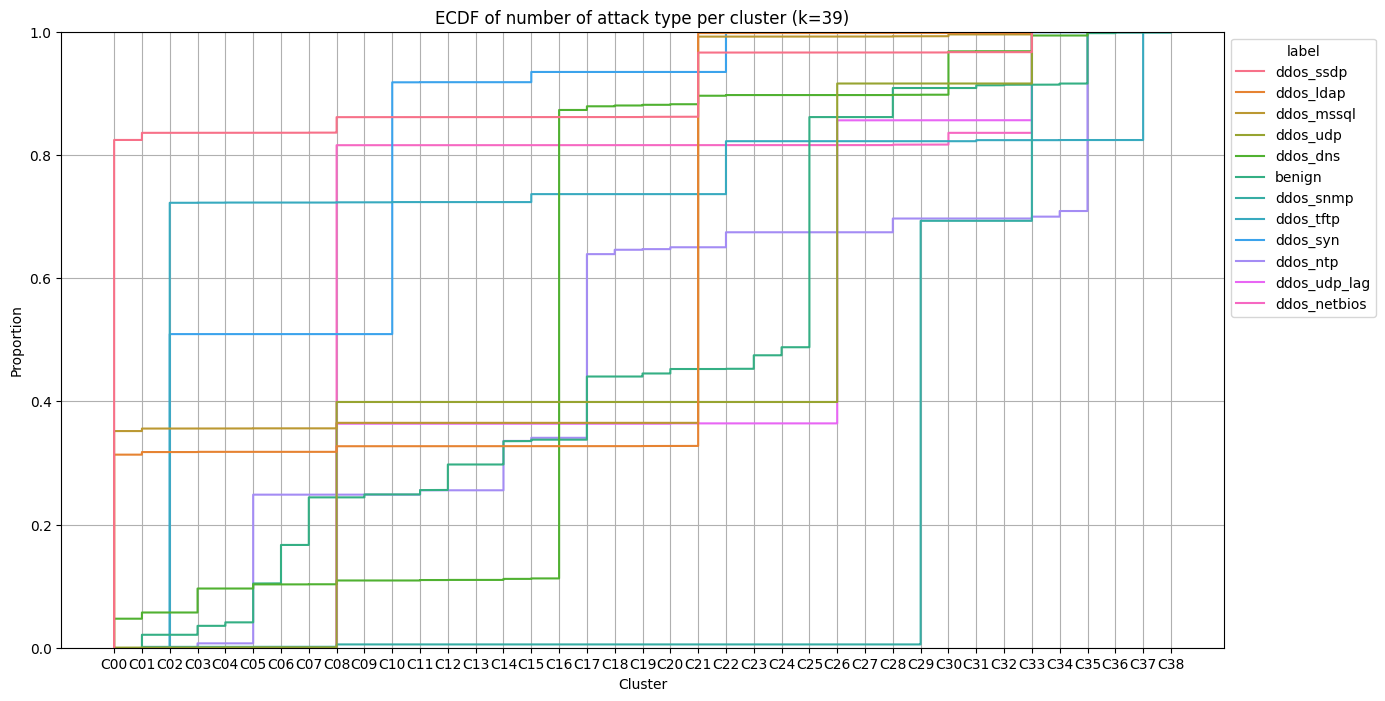

In [41]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(data=projection.sort_values('cidBest_GMM'), x='cidBest_GMM', hue='label')

plt.xlabel('Cluster')
plt.ylabel('Proportion')
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))
plt.title(f'ECDF of number of attack type per cluster (k={best_n_gmm})')
plt.grid()
plt.show()

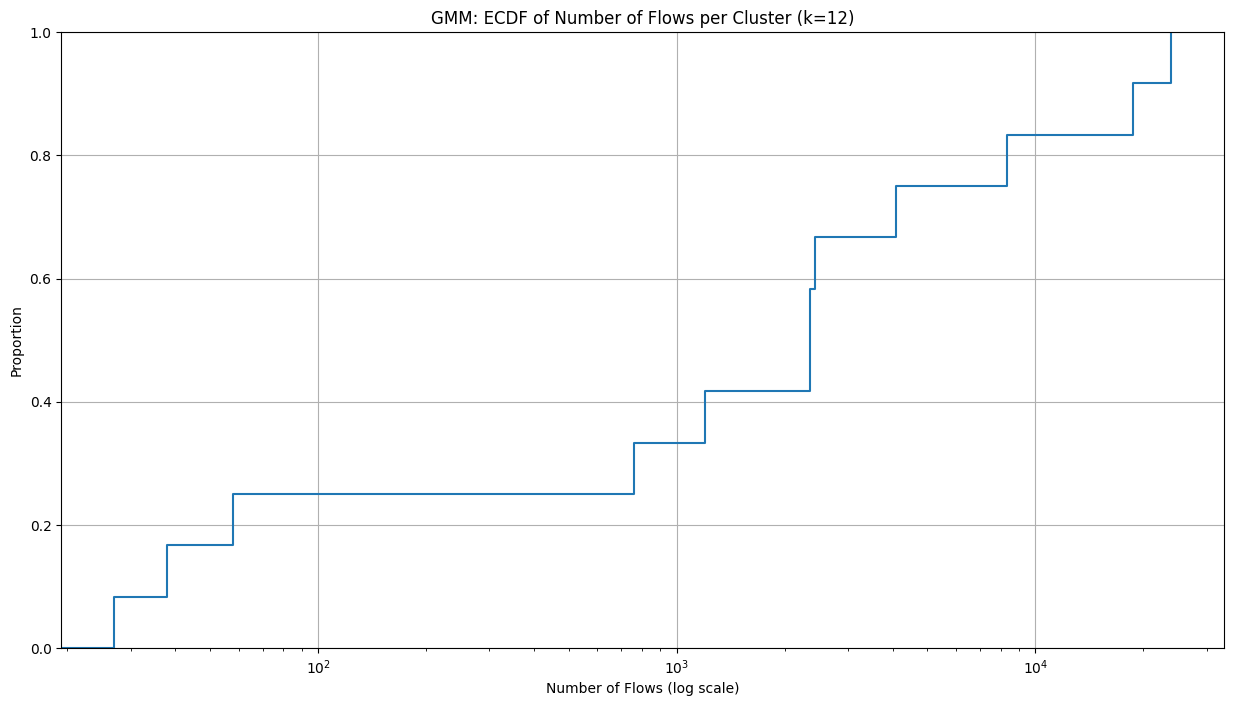

In [42]:
cluster_labels = projection.cid12_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('GMM: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

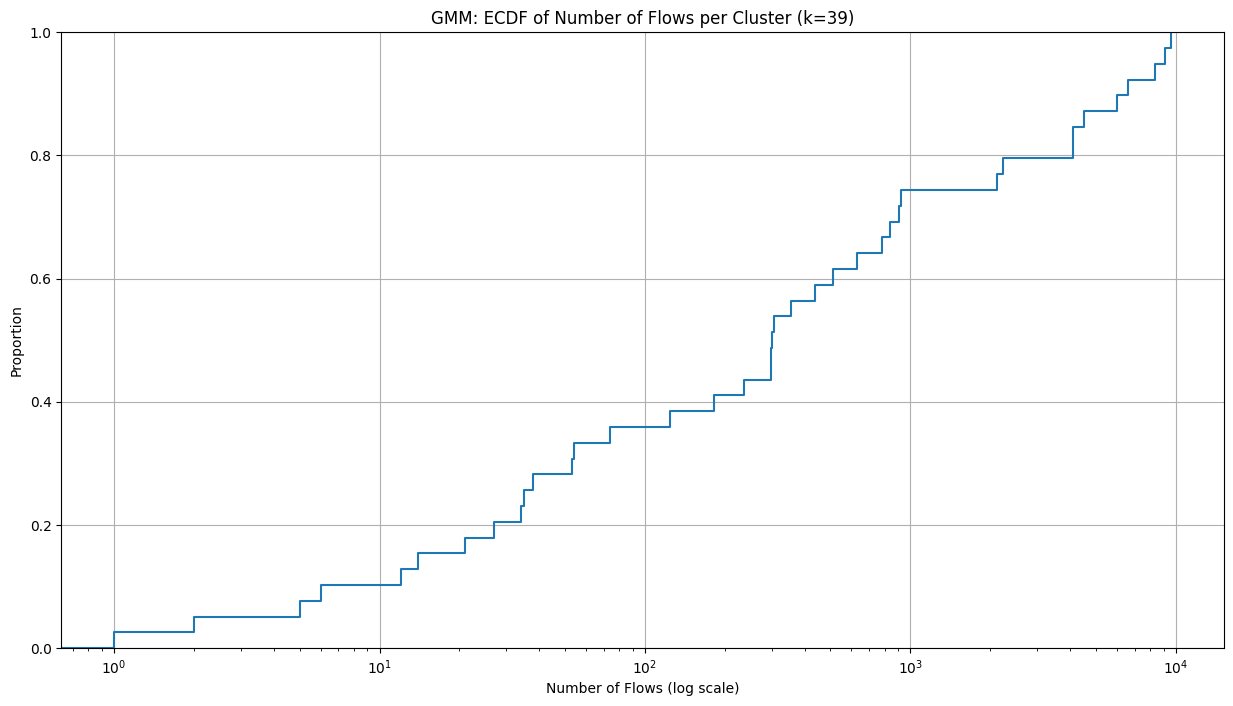

In [43]:
cluster_labels = projection.cidBest_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'GMM: ECDF of Number of Flows per Cluster (k={best_n_gmm})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

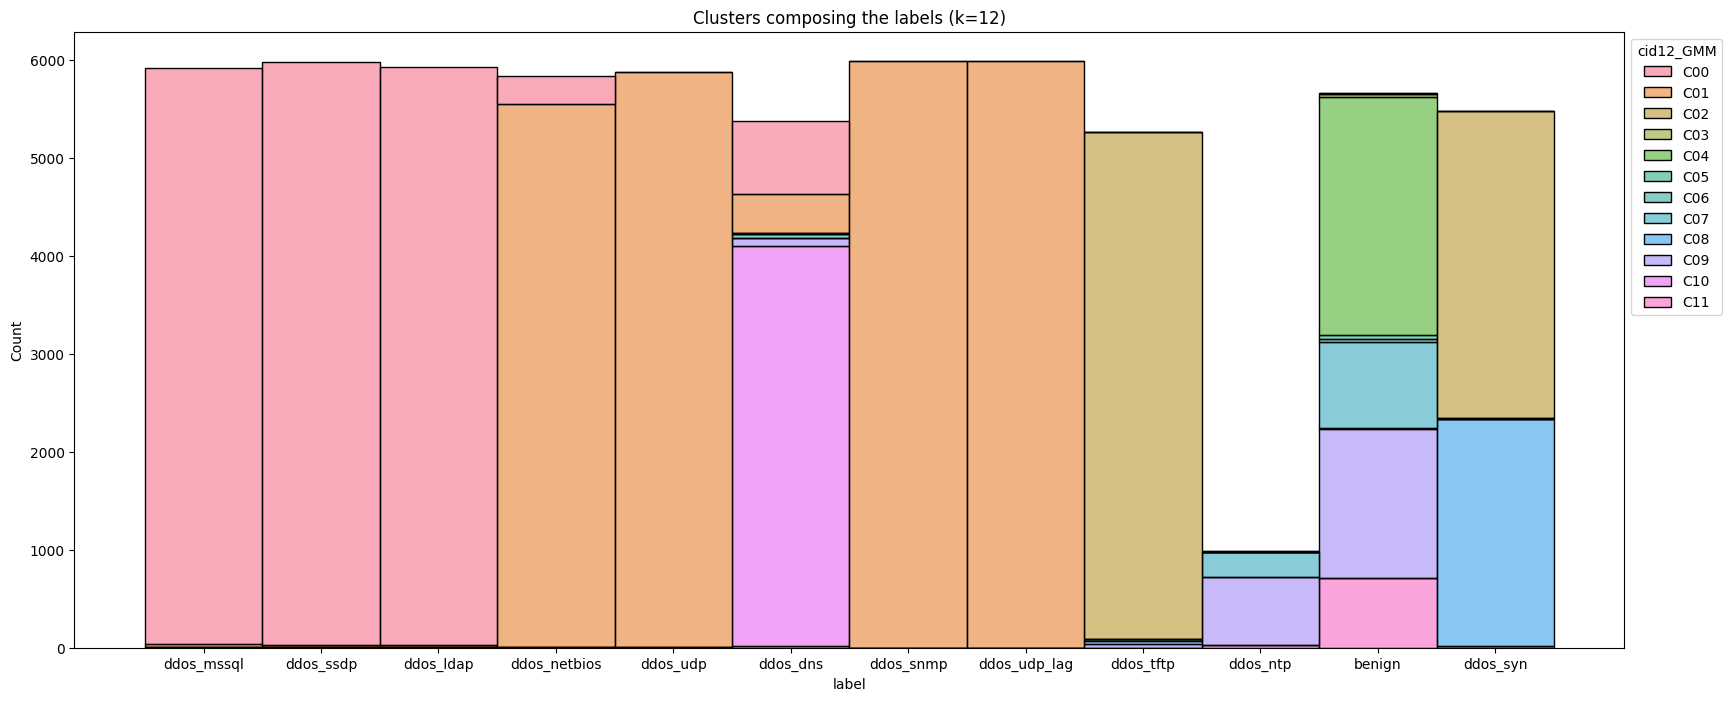

In [44]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cid12_GMM'),
    palette="husl",
    x = "label",
    hue = "cid12_GMM",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

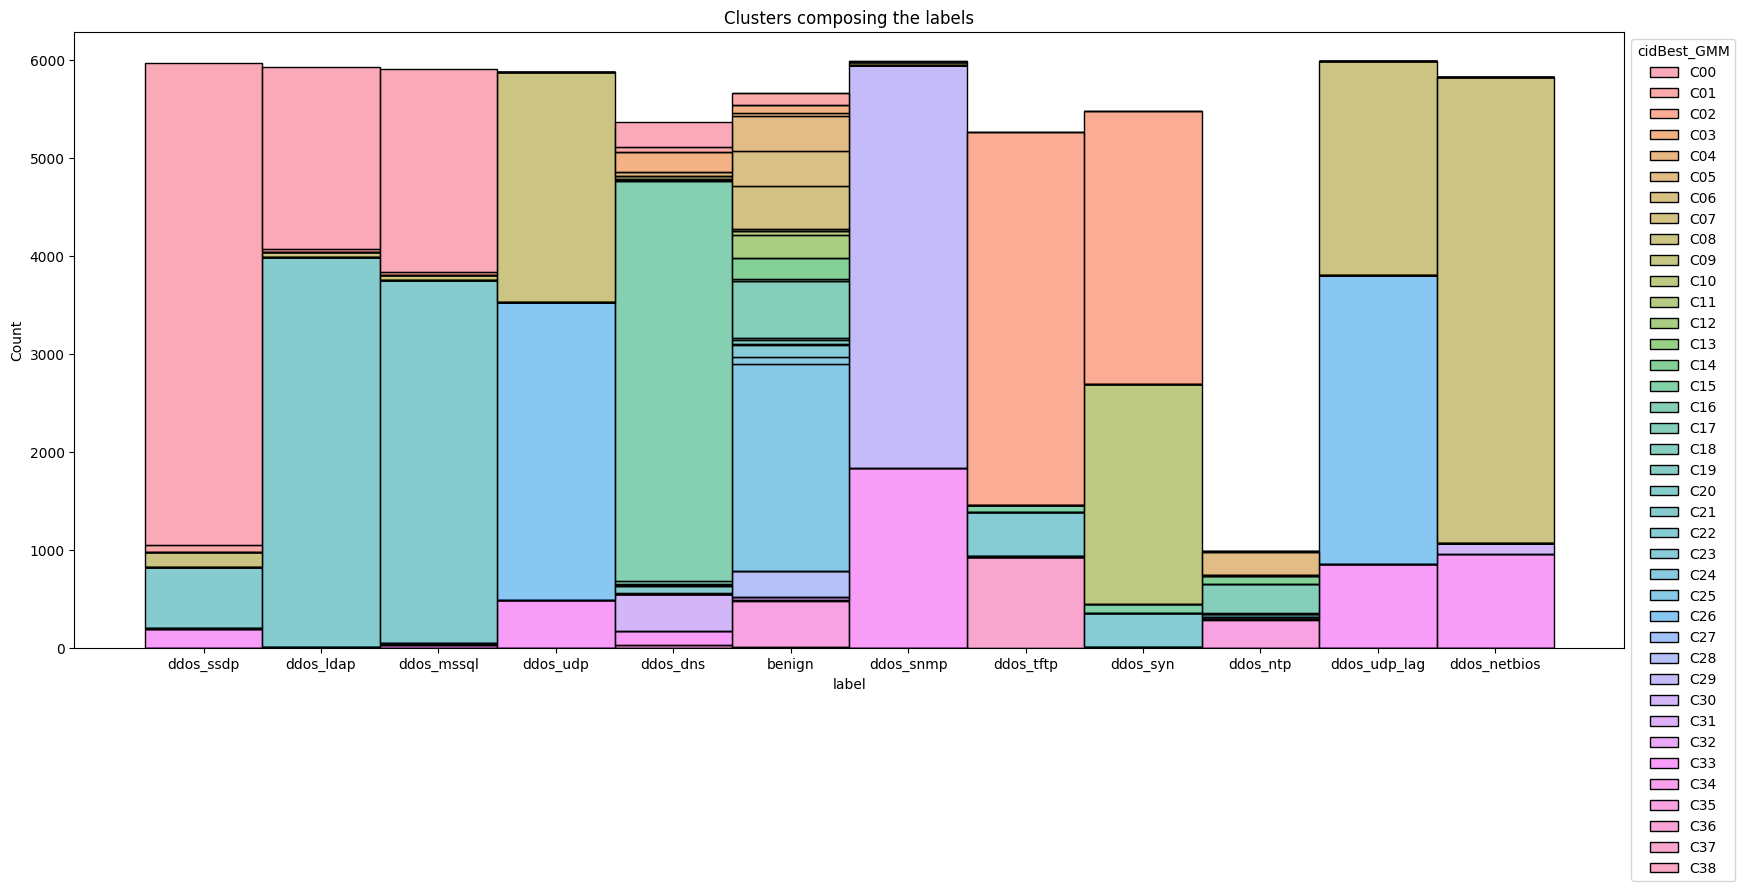

In [45]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cidBest_GMM'),
    palette="husl",
    x = "label",
    hue = "cidBest_GMM",
    multiple="stack",
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

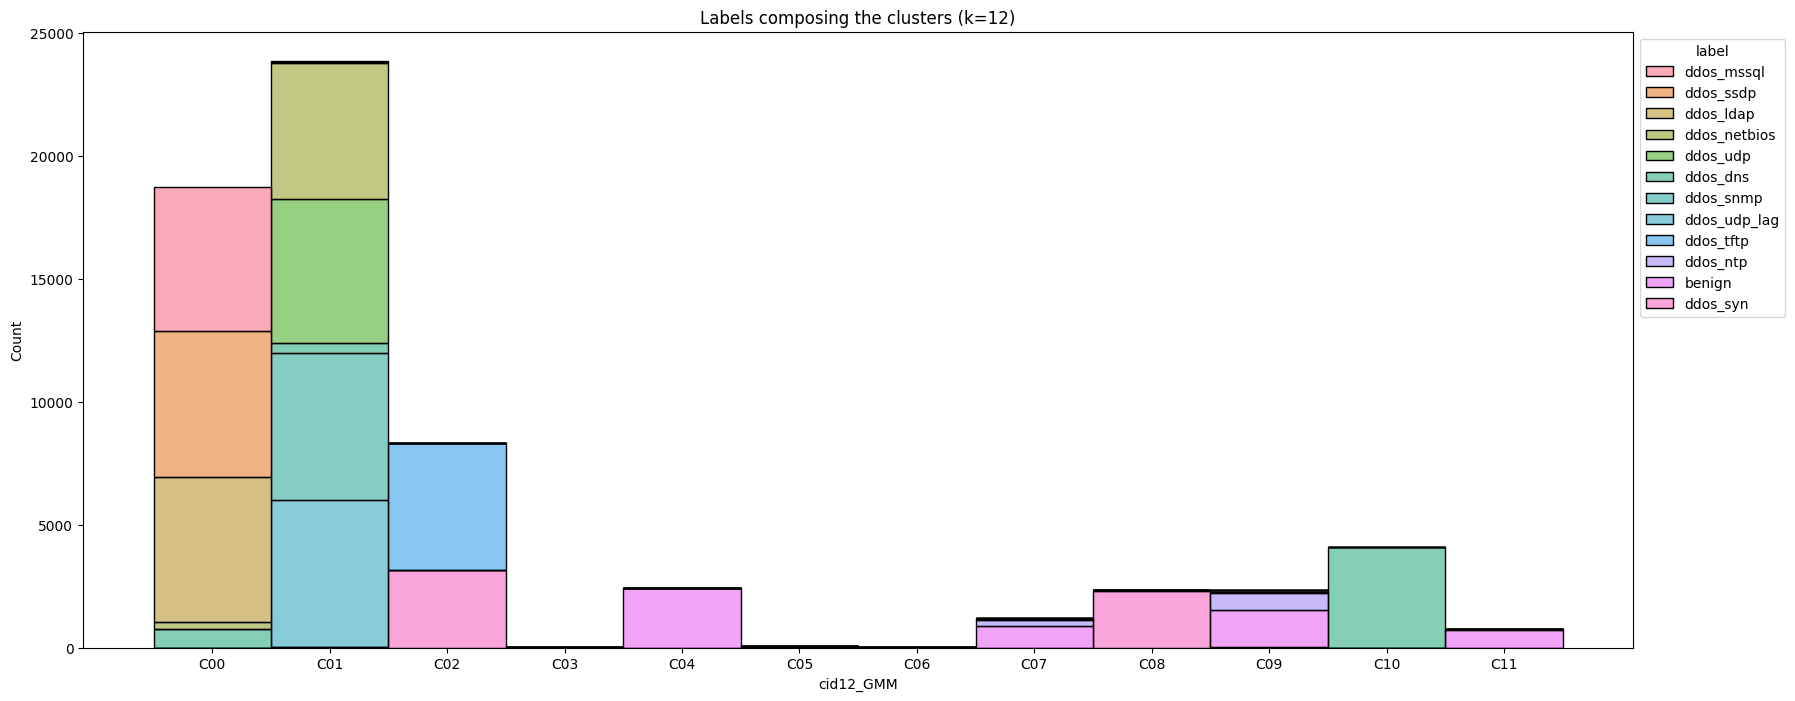

In [46]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cid12_GMM'),
    palette="husl",
    x = "cid12_GMM",
    hue = "label",
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

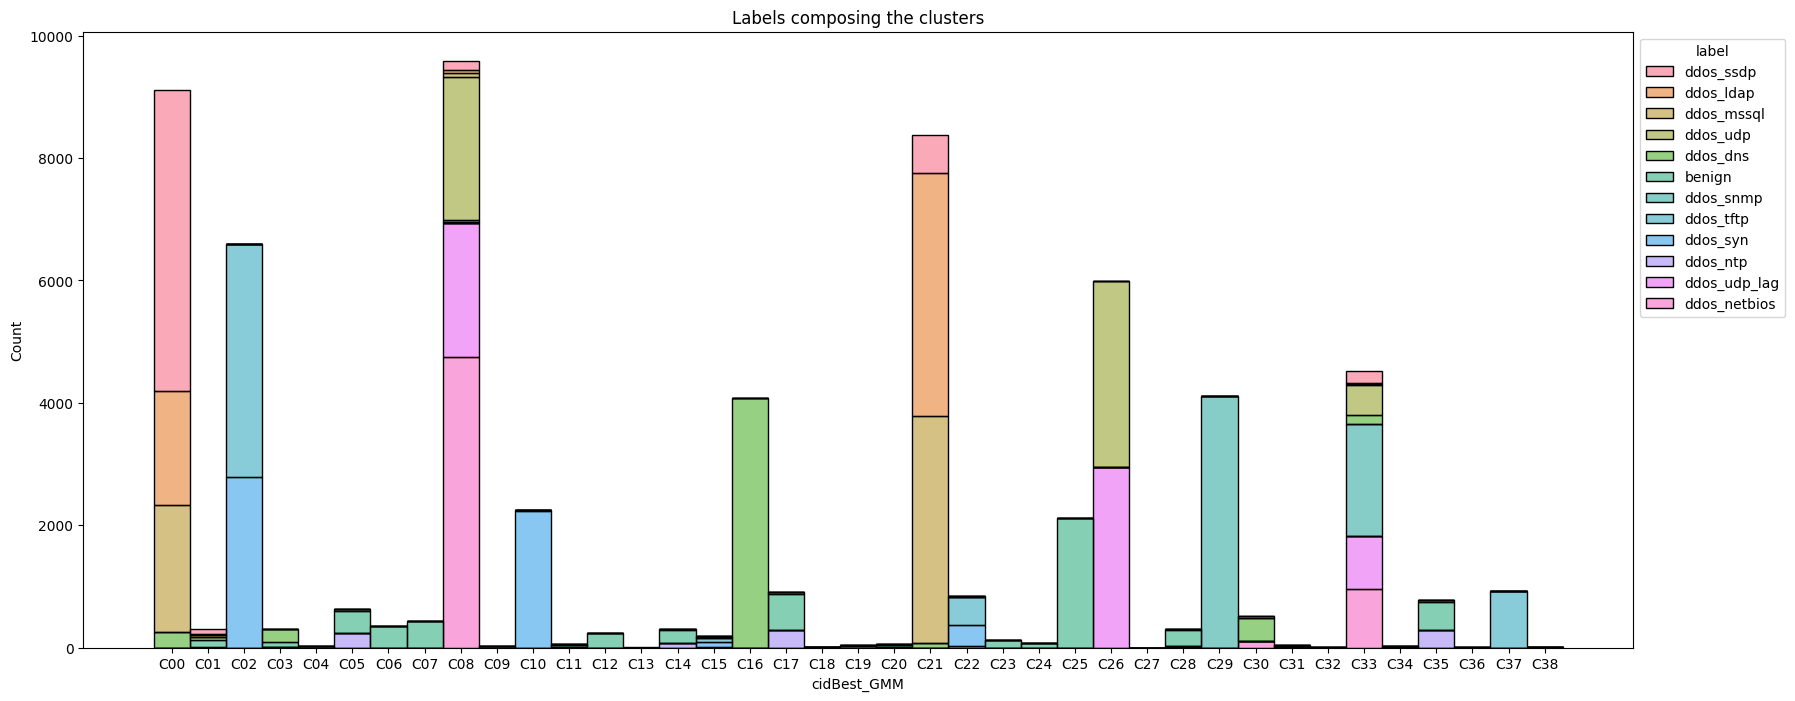

In [47]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cidBest_GMM'),
    palette="husl",
    x = "cidBest_GMM",
    hue = "label",
    multiple="stack",
    alpha = 0.6
)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## DBSCAN
**DBSCAN** is a density-based algorithm, we do not have to provide the number of clusters. The performance won't be evaluated by changing k but by varying two other parameters by performing a Grid Search:
- ``epsilon``: Maximum distance to be connected;
- ``min_samples``: Minimum number of neighbors to be a core point;

It consists of iterating over different values (combination) for two or more parameters, choosing the one leading to the best quality metrics. The number of clusters will depend on these two parameters.

Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a>.

In [48]:
# Let's first use the default options:
#   - eps: 0.5
#   - min_samples: 5

dbscan = DBSCAN()
cl_db_def = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_db_def, random_state=11)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_db_def)
ari = adjusted_rand_score(np.ravel(y), cl_db_def)

# report number and size of each cluster
(unique, counts)=np.unique( cl_db_def, return_counts=True)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  150
Size of each cluster:  [ 2144    33   122  3358    66   671     7     5 20110  2016    45     6
   178   140   130    64    19   151   130   103    14    20    26     7
    29    18   120   174   285   121    39    15    13   115    10    46
    39    10    10    23    16    31    23    12     6    12    41    19
    11   803    35   106    19    50    22    41  9405 12785    11     7
     8    55    24    25     8    65    28     9     6    12     8     5
     5     7   115     6     5    36    20     7    46     5     5    13
     8     8     6     5     7     7    23    24     6    16    16    34
    70     8    17     8     8    16     5     7    10     5     5     6
     6     6     5     5    26    44    16     8    16    20    15     5
     6     5     5     6    15     9     6     7     7     5     7     5
     9     5     5     7     5  1379  5236    62  1340    15    15     7
     5     5    10   872    49    23]
Silhouette: 0.12
RI:

In [49]:
#Trying to tune DBSCAN
#eps:The maximum distance between two samples for one to be considered as in the neighborhood of the other, default 0.5. MOST IMPORTANT
#min_samples:The number of samples (or total weight) in a neighborhood for a point to be considered as a core point, default 5.

#eps ANALYSIS

eps_list=[]
shs_list_dbscan = []
ri_list_dbscan = []
ari_list_dbscan = []
cluster_n_list_dbscan = []
results_dbscan = []


for e in np.arange(0.01, 1.2, 0.2):
  print(f'{e}---------------------------')
  dbscan = DBSCAN(eps = e)
  cl_labels_dbscan = dbscan.fit_predict(X) # Get clusters ID

  # Unsupervised metric
  silhouette  = silhouette_score(X, cl_labels_dbscan)
  # Supervised metrics
  ri = rand_score(np.ravel(y), cl_labels_dbscan)
  ari = adjusted_rand_score(np.ravel(y), cl_labels_dbscan)
  (unique, counts)=np.unique( cl_labels_dbscan, return_counts=True)
  print("Size of each cluster: ", counts)
  print("Number of clusters: ", len(counts))
  print(f'Silhouette: {round(silhouette, 2)}')
  print(f'RI: {round(ri, 2)}')
  print(f'ARI: {round(ari, 2)}')
  eps_list.append(e)
  shs_list_dbscan.append(silhouette)
  ri_list_dbscan.append(ri)
  ari_list_dbscan.append(ari)
  cluster_n_list_dbscan.append(len(counts))
  results_dbscan.append((e, silhouette, ri, ari, len(counts)))

results_eps_df = pd.DataFrame(results_dbscan, columns=['eps', 'sh', 'ri', 'ari', 'clusters'])
results_eps_df.to_csv('results_eps_DBSCAN.csv', sep=',')

0.01---------------------------
Size of each cluster:  [40616  3034     5    13     7    12  5523    19    11    36    48  6988
     5    24    11    24     6    27    53    36    59    20    86    30
     7    37    15    36  2447    41    41    14    15     7    14    30
     7     6     6     8     9     5     5    10    16     7     5     6
     9     5     5     5     6    13     5    18    11    13     6     5
    14     9     5     8     7    14     9     9     5     6    14     7
    10     6    28     5     5     5    10     6     5     7     5     6
     5     5     5     8     5    10    11    15     5     5     5    19
    50    39    51    20    18     6    29     6     8    44     5    13
    92     6    37     5     5     7    13    10    40    14     7    28
    26    22     7     7    15     7     7     5    26    15     7     8
     5     6     5     5     5     5     7     7     9     5     6     9
    12  1067    11    16    10     6     5    25     9     8    17   

In [50]:
results_eps_df = pd.read_csv("results_eps_DBSCAN.csv", header=0, index_col=0, engine='python')
shs_list_dbscan = np.array(results_eps_df[['sh']])
eps_list_dbscan = np.array(results_eps_df[['eps']])
ri_list_dbscan = np.array(results_eps_df[['ri']])
ari_list_dbscan = np.array(results_eps_df[['ari']])

best eps:  [0.41]  with corresponding silhouette:  0.2314885950231907


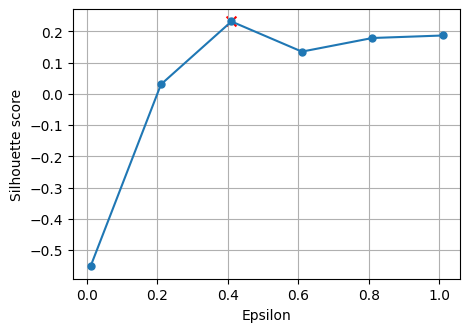

In [51]:
#eps curves
#ri, ari, shs, n_clusters

best_sh_dbscan= np.max(shs_list_dbscan)
best_e_dbscan=eps_list[np.argmax(shs_list_dbscan)]
print("best eps: ", best_e_dbscan, " with corresponding silhouette: ", best_sh_dbscan)

# Plot silhouette
plt.figure(figsize=(5, 3.5))
plt.plot(eps_list,shs_list_dbscan, marker='o', markersize=5)
plt.scatter(best_e_dbscan, best_sh_dbscan, color='r', marker='x', s=50)
plt.grid()
plt.xlabel('Epsilon')
plt.ylabel('Silhouette score')
plt.show()

In [52]:
#min_samples ANALYSIS

mins_list_dbscan=[]
shs_list_dbscan_mins = []
ri_list_dbscan_mins = []
ari_list_dbscan_mins = []
cluster_n_list_dbscan_mins = []
results_dbscan_mins = []


for m in range(1, 40, 2):
  print(f'{m}---------------------------')
  dbscan = DBSCAN(n_jobs=-1, min_samples = m)
  cl_labels_dbscan_mins = dbscan.fit_predict(X) # Get clusters ID

  # Unsupervised metric
  silhouette  = silhouette_score(X, cl_labels_dbscan_mins, random_state=11)
  # Supervised metrics
  ri = rand_score(np.ravel(y), cl_labels_dbscan_mins)
  ari = adjusted_rand_score(np.ravel(y), cl_labels_dbscan_mins)
  (unique, counts)=np.unique( cl_labels_dbscan_mins, return_counts=True)
  # print("Size of each cluster: ", counts)
  print("Number of clusters: ", len(counts))
  print(f'Silhouette: {round(silhouette, 2)}')
  print(f'RI: {round(ri, 2)}')
  print(f'ARI: {round(ari, 2)}')
  mins_list_dbscan.append(m)
  shs_list_dbscan_mins.append(silhouette)
  ri_list_dbscan_mins.append(ri)
  ari_list_dbscan_mins.append(ari)
  cluster_n_list_dbscan_mins.append(len(counts))
  results_dbscan_mins.append((m, silhouette, ri, ari, len(counts)))

results_min_df = pd.DataFrame(results_dbscan_mins, columns=['m', 'sh', 'ri', 'ari', 'clusters'])
results_min_df.to_csv('results_min_DBSCAN.csv', sep=',')

1---------------------------
Number of clusters:  1794
Silhouette: -0.21
RI: 0.83
ARI: 0.25
3---------------------------
Number of clusters:  253
Silhouette: -0.03
RI: 0.83
ARI: 0.25
5---------------------------
Number of clusters:  150
Silhouette: 0.12
RI: 0.83
ARI: 0.26
7---------------------------
Number of clusters:  118
Silhouette: 0.3
RI: 0.9
ARI: 0.39
9---------------------------
Number of clusters:  99
Silhouette: 0.32
RI: 0.91
ARI: 0.41
11---------------------------
Number of clusters:  91
Silhouette: 0.31
RI: 0.91
ARI: 0.41
13---------------------------
Number of clusters:  82
Silhouette: 0.34
RI: 0.91
ARI: 0.41
15---------------------------
Number of clusters:  75
Silhouette: 0.35
RI: 0.91
ARI: 0.41
17---------------------------
Number of clusters:  66
Silhouette: 0.35
RI: 0.91
ARI: 0.41
19---------------------------
Number of clusters:  65
Silhouette: 0.35
RI: 0.91
ARI: 0.41
21---------------------------
Number of clusters:  63
Silhouette: 0.34
RI: 0.91
ARI: 0.41
23--------

In [53]:
results_min_df = pd.read_csv("results_min_DBSCAN.csv", header=0, index_col=0, engine='python')
shs_list_dbscan_mins = np.array(results_min_df[['sh']])
mins_list_dbscan = np.array(results_min_df[['m']])
ri_list_dbscan_mins = np.array(results_min_df[['ri']])
ari_list_dbscan_mins = np.array(results_min_df[['ari']])

best mins:  [27]  with corresponding silhouette:  0.3478912692822872


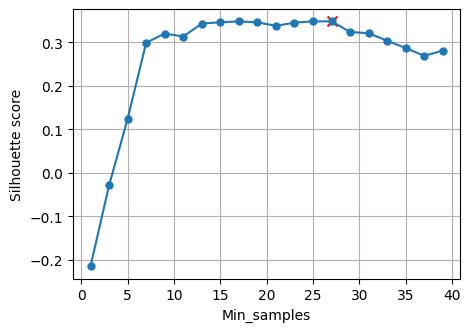

In [54]:
#min_samples curves
#ri, ari, shs, n_clusters

best_sh_dbscan_mins= np.max(shs_list_dbscan_mins)
best_mins_dbscan_mins=mins_list_dbscan[np.argmax(shs_list_dbscan_mins)]
print("best mins: ", best_mins_dbscan_mins, " with corresponding silhouette: ", best_sh_dbscan_mins)

# Plot silhouette
plt.figure(figsize=(5, 3.5))
plt.plot(mins_list_dbscan,shs_list_dbscan_mins, marker='o', markersize=5)
plt.scatter(best_mins_dbscan_mins, best_sh_dbscan_mins, color='r', marker='x', s=50)
plt.grid()
plt.xlabel('Min_samples')
plt.ylabel('Silhouette score')
plt.show()

In [55]:
# Now analyze the performance varying epsilon and min_samples.

shs_dbscan_epsmins = []

for eps in np.arange(0.4, 0.9, 0.1):
    eps = round(eps,3)
    for mins in range(20, 40,2):
        print(f'eps:{eps}, mins:{mins}---------------------------------------------')
        dbscan = DBSCAN(eps=eps, min_samples=mins, n_jobs=-1)
        cl_labels_dbscan_epsmins = dbscan.fit_predict(X)
        try:
            silhouette  = silhouette_score(X, cl_labels_dbscan_epsmins)
        except:
            silhouette = np.nan

        ri = rand_score(np.ravel(y), cl_labels_dbscan_epsmins)
        ari = adjusted_rand_score(np.ravel(y), cl_labels_dbscan_epsmins)
        (unique, counts)=np.unique( cl_labels_dbscan_epsmins, return_counts=True)
        shs_dbscan_epsmins.append((eps, mins, silhouette, ri, ari, len(counts)))
        print(f'Silhouette: {round(silhouette, 2)}')
        print(f'RI: {round(ri, 2)}')
        print(f'ARI: {round(ari, 2)}')
        print("Number of clusters: ", len(counts))
gs = pd.DataFrame(shs_dbscan_epsmins, columns=['eps', 'minPts', 'sh', 'ri', 'ari', 'cluster'])
gs.to_csv('dbscan_values2.csv', sep=',')

eps:0.4, mins:20---------------------------------------------
Silhouette: 0.26
RI: 0.91
ARI: 0.41
Number of clusters:  63
eps:0.4, mins:22---------------------------------------------
Silhouette: 0.26
RI: 0.9
ARI: 0.4
Number of clusters:  56
eps:0.4, mins:24---------------------------------------------
Silhouette: 0.24
RI: 0.9
ARI: 0.4
Number of clusters:  57
eps:0.4, mins:26---------------------------------------------
Silhouette: 0.22
RI: 0.9
ARI: 0.4
Number of clusters:  56
eps:0.4, mins:28---------------------------------------------
Silhouette: 0.23
RI: 0.9
ARI: 0.4
Number of clusters:  47
eps:0.4, mins:30---------------------------------------------
Silhouette: 0.25
RI: 0.9
ARI: 0.4
Number of clusters:  48
eps:0.4, mins:32---------------------------------------------
Silhouette: 0.25
RI: 0.9
ARI: 0.4
Number of clusters:  44
eps:0.4, mins:34---------------------------------------------
Silhouette: 0.24
RI: 0.9
ARI: 0.4
Number of clusters:  43
eps:0.4, mins:36----------------------

In [56]:
# Load previously saved results from DBSCAN
dbscan_result_df = pd.read_csv("dbscan_values2.csv", header=0, index_col=0, engine='python')
gs = pd.pivot_table(dbscan_result_df, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

gs_sil = dbscan_result_df[['eps', 'minPts', 'sh']]
gs_sil = pd.pivot_table(gs_sil, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

gs_ari = dbscan_result_df[['eps', 'minPts', 'ari']]
gs_ari = pd.pivot_table(gs_ari, columns='eps', index='minPts', values='ari', aggfunc=lambda x:x)


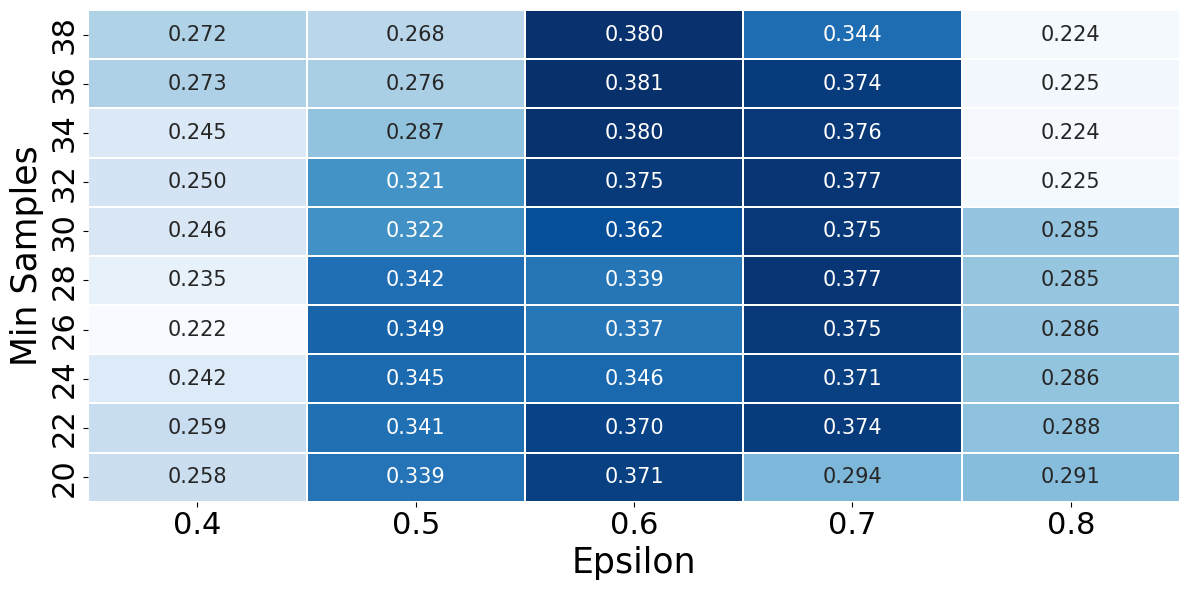

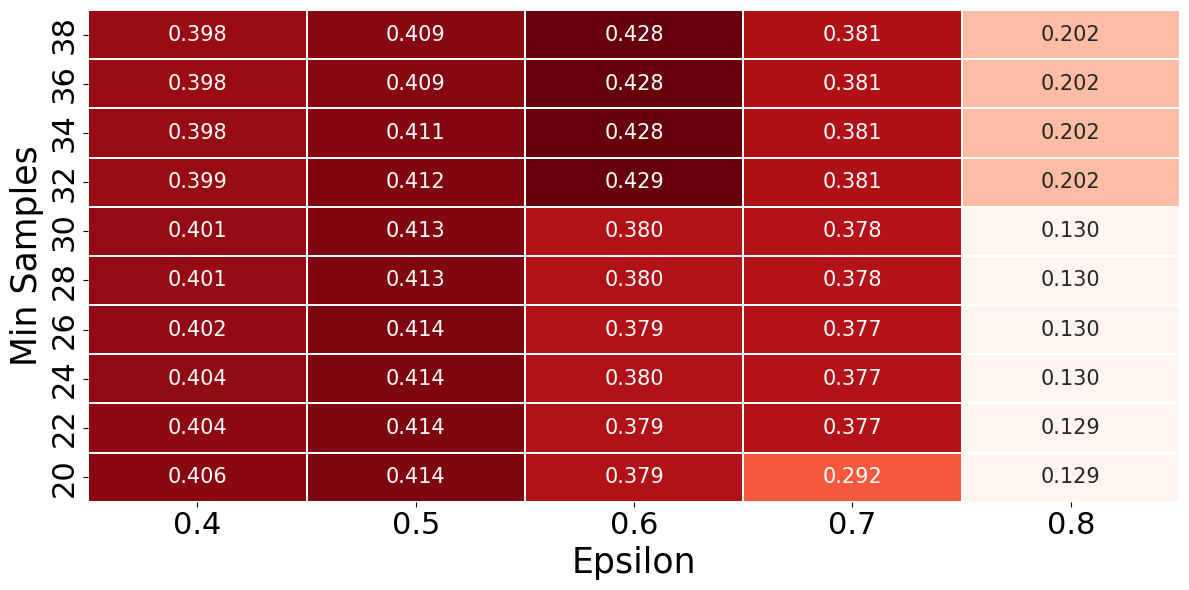

In [57]:
plt.figure(figsize=(12, 6))
max_sil = gs_sil.max().max()
mins_max_sil = gs_sil.stack().idxmax()[0]
eps_max_sil = gs_sil.stack().idxmax()[1]
sns.heatmap(gs_sil, annot=True, fmt=".3f", cmap="Blues", annot_kws={'size': 15}, cbar=False, linewidths=.005)
plt.gca().invert_yaxis()
# axes[0].set_title(f'The maximum silhouette score is {max_sil} with min_samples of {mins_max_sil} and epsilon of {eps_max_sil}')
plt.xlabel("Epsilon", fontsize=25)
plt.ylabel("Min Samples", fontsize=25)
plt.tick_params(labelsize=22)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
max_ari = gs_ari.max().max()
mins_max_ari = gs_ari.stack().idxmax()[0]
eps_max_ari = gs_ari.stack().idxmax()[1]
sns.heatmap(gs_ari, annot=True, fmt=".3f", cmap="Reds", annot_kws={'size': 15}, cbar=False, linewidths=.005)
plt.gca().invert_yaxis()
# axes[1].set_title(f'The maximum adjusted rand index score is {max_ari} with min_samples of {mins_max_ari} and epsilon of {eps_max_ari}')
plt.ylabel("Min Samples", fontsize=25)
plt.xlabel("Epsilon", fontsize=25)
plt.tick_params(labelsize=22)

plt.tight_layout()
plt.show()

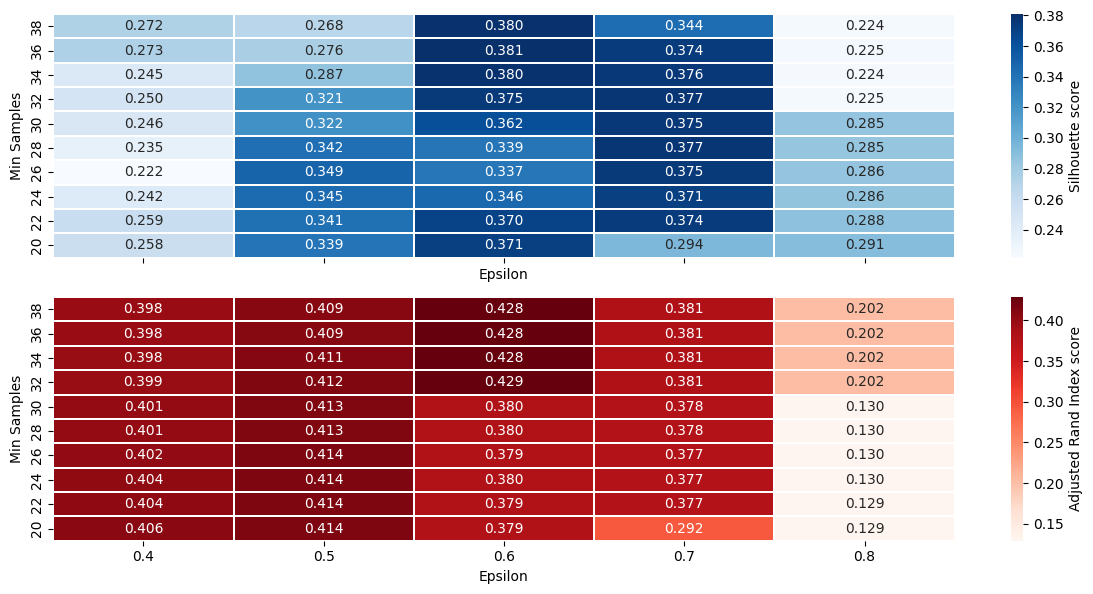

In [58]:
# Plot the silhouette score for the different values with a heatmap
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
max_sil = gs_sil.max().max()
mins_max_sil = gs_sil.stack().idxmax()[0]
eps_max_sil = gs_sil.stack().idxmax()[1]
sns.heatmap(gs_sil, annot=True, fmt=".3f", cmap="Blues", ax=axes[0], cbar_kws={'label':'Silhouette score'}, linewidths=.005)
axes[0].invert_yaxis()
# axes[0].set_title(f'The maximum silhouette score is {max_sil} with min_samples of {mins_max_sil} and epsilon of {eps_max_sil}')
axes[0].set_xlabel("Epsilon")
axes[0].set_ylabel("Min Samples")

max_ari = gs_ari.max().max()
mins_max_ari = gs_ari.stack().idxmax()[0]
eps_max_ari = gs_ari.stack().idxmax()[1]
sns.heatmap(gs_ari, annot=True, fmt=".3f", cmap="Reds", ax=axes[1], cbar_kws={'label':'Adjusted Rand Index score'}, linewidths=.005)
axes[1].invert_yaxis()
# axes[1].set_title(f'The maximum adjusted rand index score is {max_ari} with min_samples of {mins_max_ari} and epsilon of {eps_max_ari}')
axes[1].set_ylabel("Min Samples")
axes[1].set_xlabel("Epsilon")

plt.tight_layout()
plt.show()

In [59]:
# Report the results of the best combination based on silhouette and adjusted rand index
eps_best = 0.6
min_samples_best = 36
dbscan = DBSCAN(eps=eps_best, min_samples=min_samples_best )
dbscan_best_labels = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, dbscan_best_labels, random_state=11)
# Supervised metrics
ri = rand_score(np.ravel(y), dbscan_best_labels)
ari = adjusted_rand_score(np.ravel(y), dbscan_best_labels)

# report number and size of each cluster
(unique, counts)=np.unique( dbscan_best_labels, return_counts=True)
best_n_dbscan=len(unique)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  41
Size of each cluster:  [4575 3358  672 2033 2020   45   51  100  140  130  149  130  103  120
  284  121  116   46   40   32  146 9597  231 8263   49 8616 9313 4151
   38   44   65   41  115   46   70  960  779 5234 1329  839   48]
Silhouette: 0.38
RI: 0.9
ARI: 0.43


### PCA clusters visualization

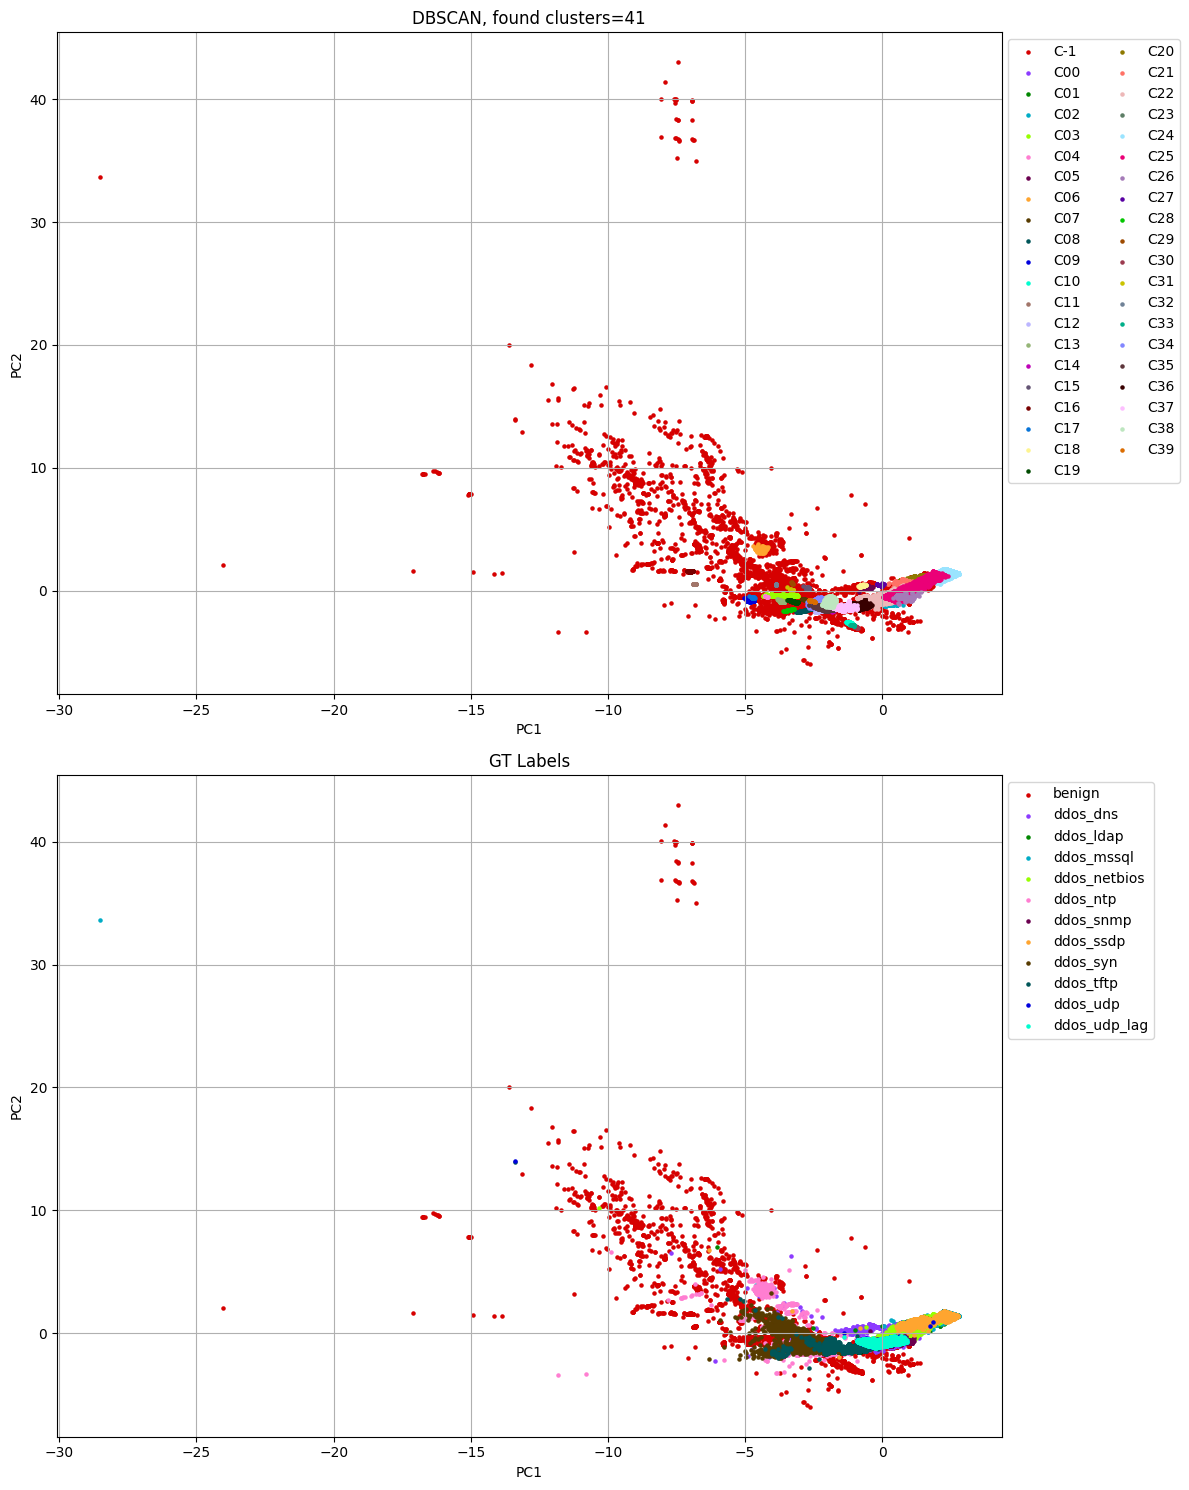

In [60]:
best_n_dbscan=len(unique)

projection['cidBest_DBSCAN'] = [f'C{x:02}' for x in dbscan_best_labels]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(2, 1, figsize=(12, 15))
idx = 0
for i in np.unique(projection.cidBest_DBSCAN):
    subdf = projection[projection.cidBest_DBSCAN==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx +=1
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'DBSCAN, found clusters={best_n_dbscan}')

idx = 0
for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx+=1
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')

plt.tight_layout()
plt.show()

### t-SNE clusters visualization

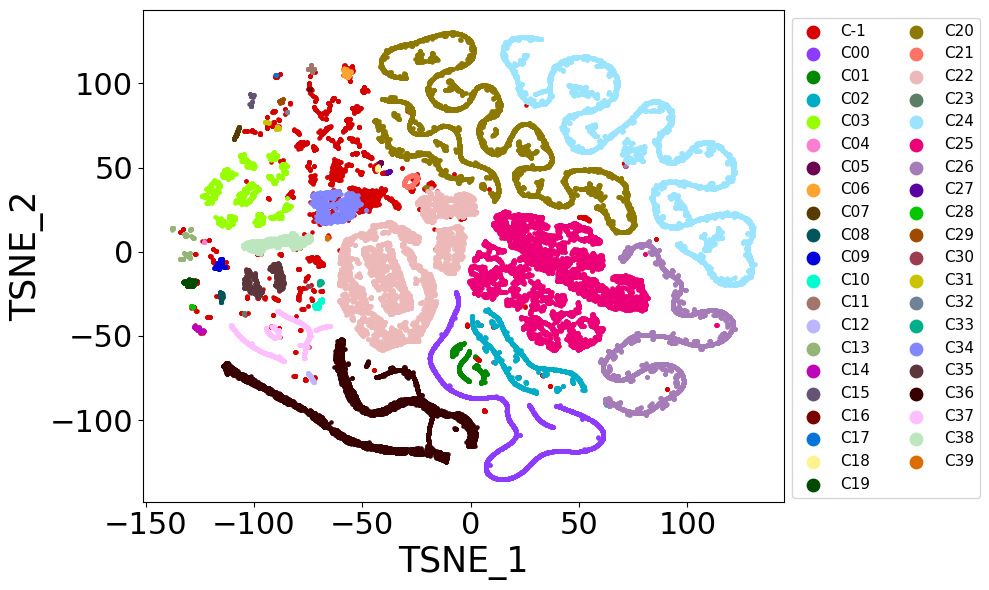

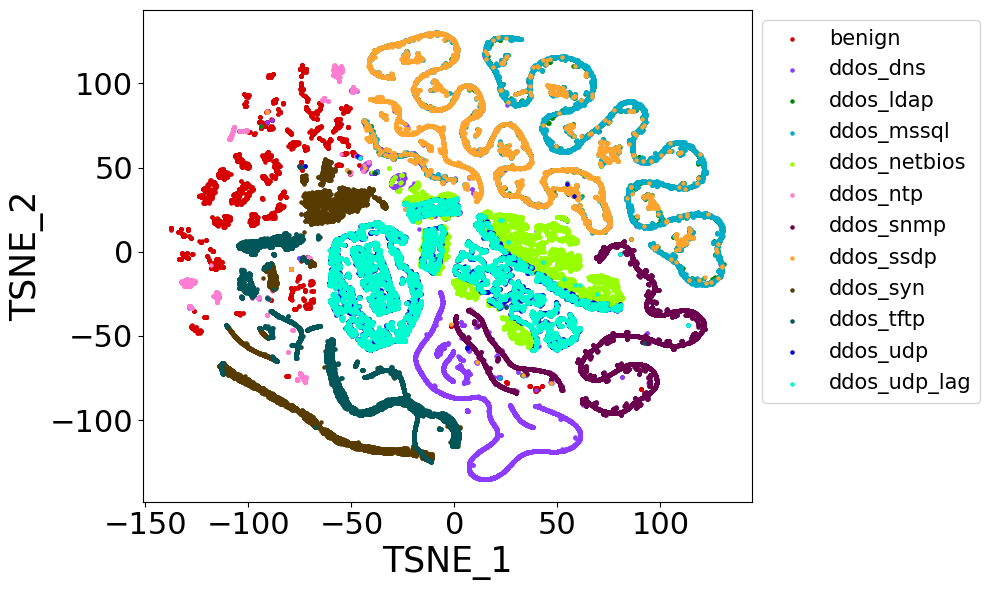

In [61]:
# First graph: DBSCAN clusters
projection_tsne['cidBest_DBSCAN'] = [f'C{x:02}' for x in dbscan_best_labels]
plt.figure(figsize=(10, 6))
idx = 0
for i in np.unique(projection_tsne.cidBest_DBSCAN):
    subdf = projection_tsne[projection_tsne.cidBest_DBSCAN == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx +=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=11, markerscale=4, ncol=2)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
# plt.title(f'DBSCAN, found clusters={best_n}')
plt.tight_layout()
plt.show()

idx = 0
# Second graph: Ground truth labels
plt.figure(figsize=(10, 6))
for i in np.unique(y):
    subdf = projection_tsne[projection_tsne.label == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5, color = cc.glasbey[idx])
    idx +=1
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=15, ncol=1)
plt.xlabel('TSNE_1', fontsize=25)
plt.ylabel('TSNE_2', fontsize=25)
plt.tick_params(labelsize=22)
# plt.title('GT Labels')
plt.tight_layout()
plt.show()


### Clusters analysis

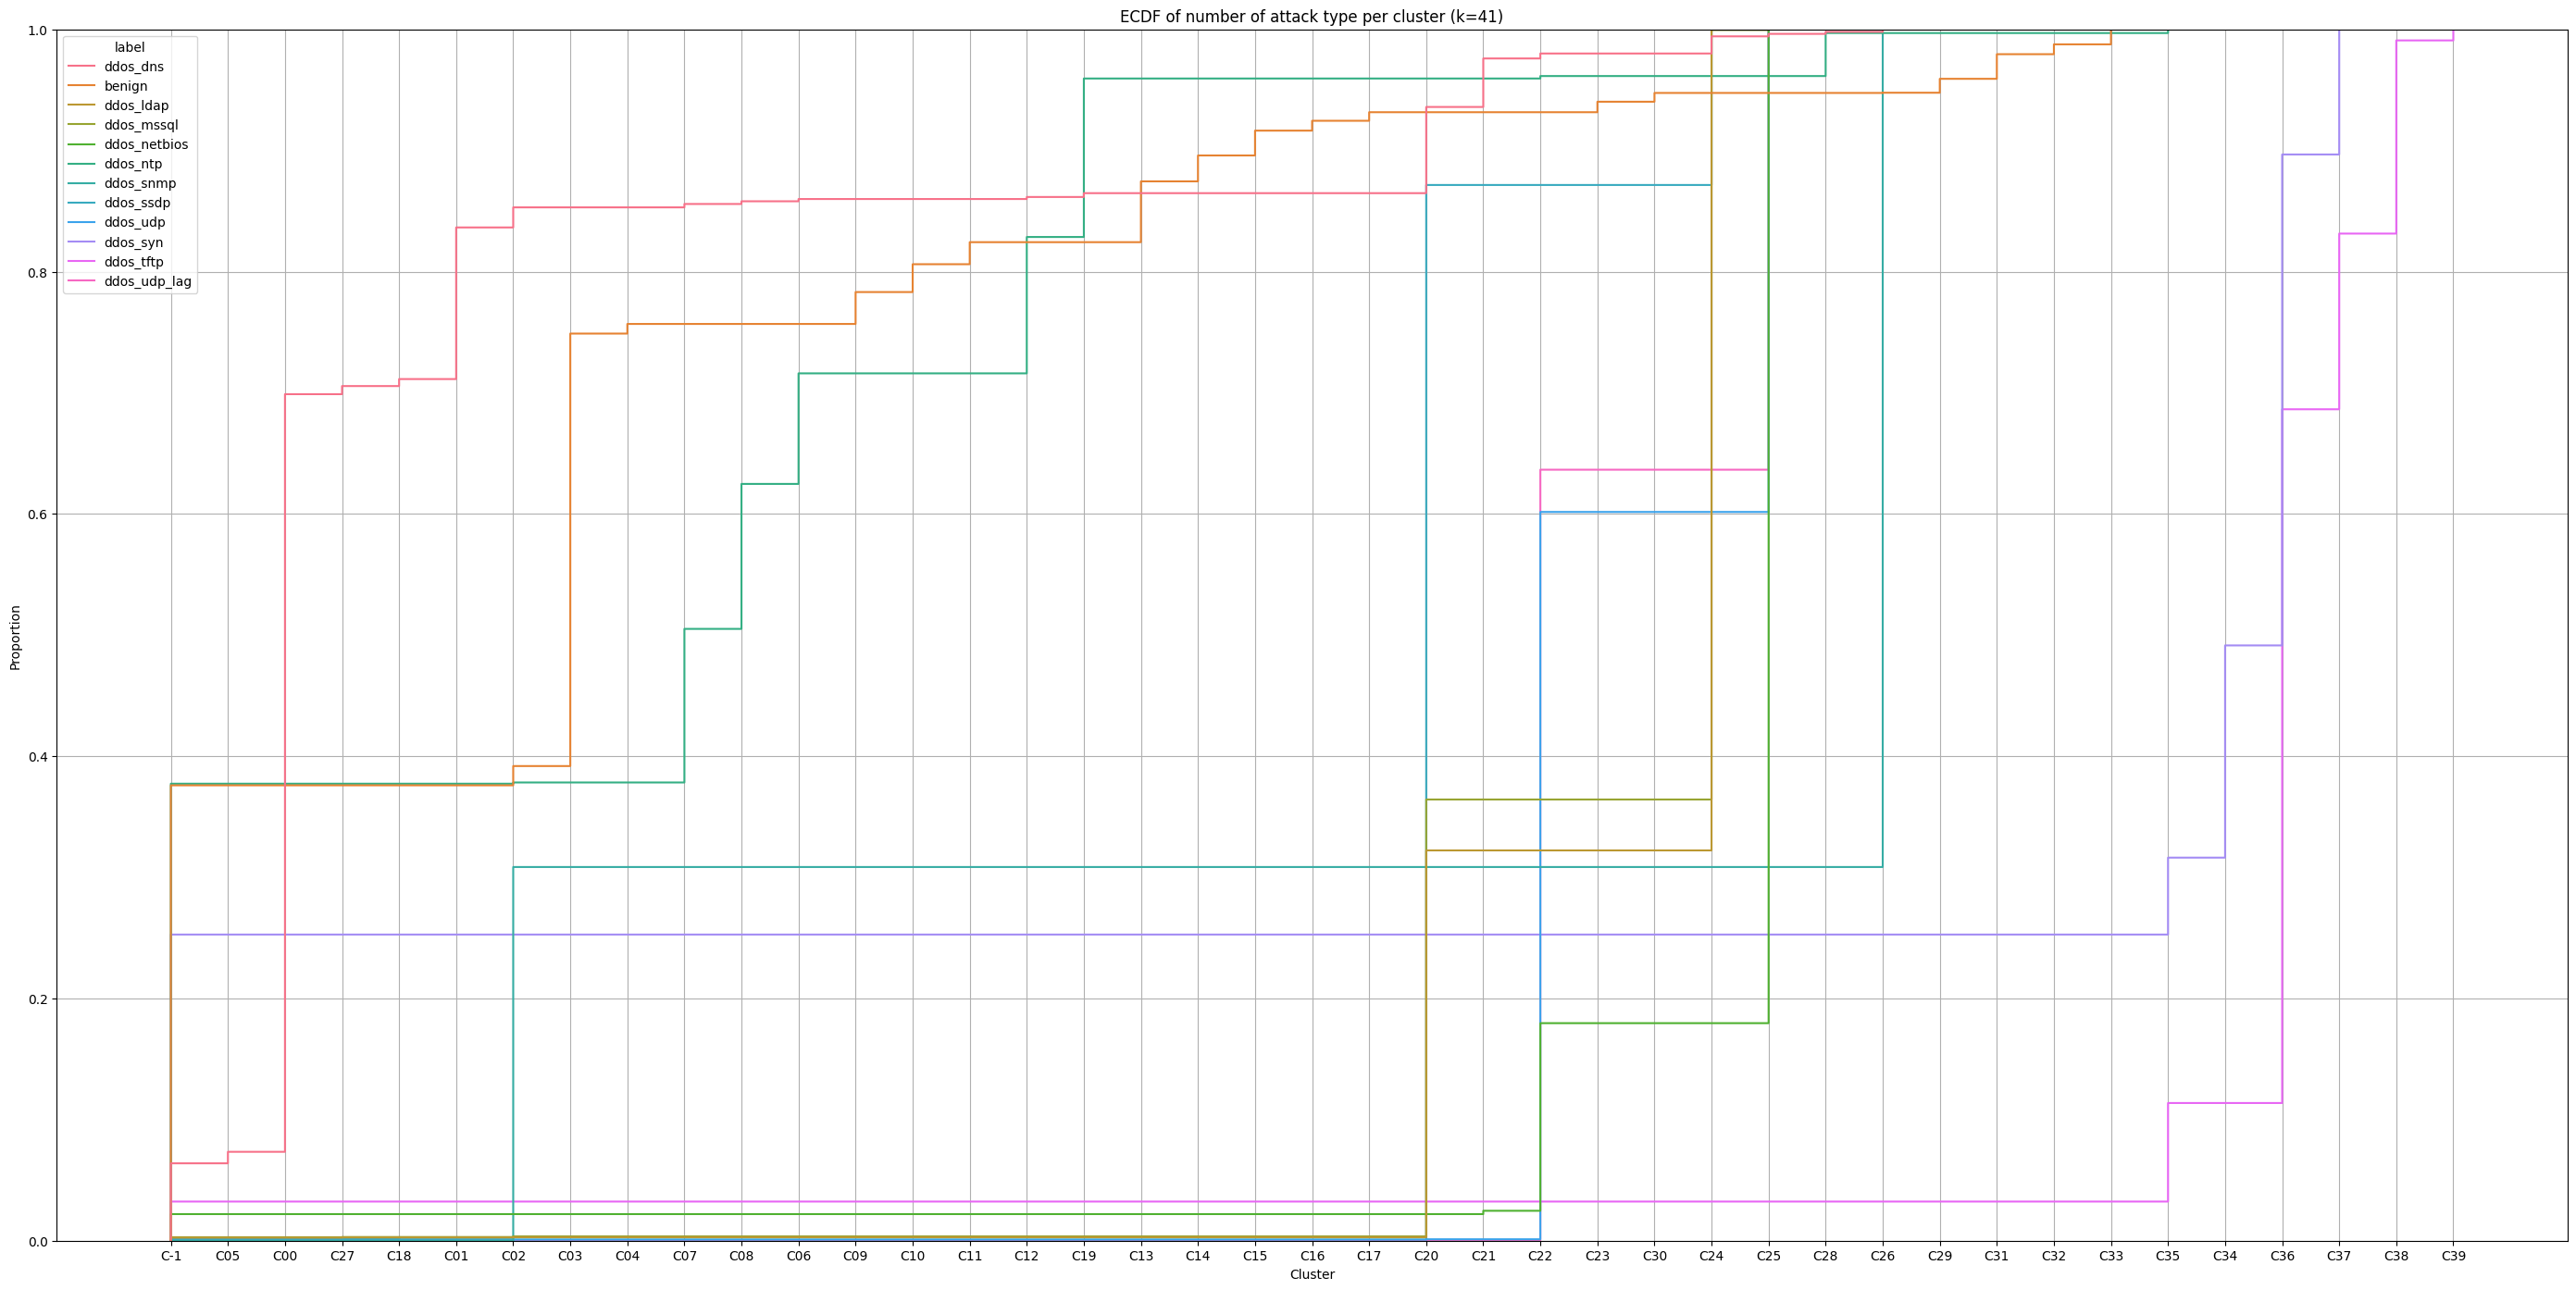

In [62]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(35, 17))
sns.ecdfplot(data=projection, x='cidBest_DBSCAN', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n_dbscan})')
plt.grid()
plt.show()

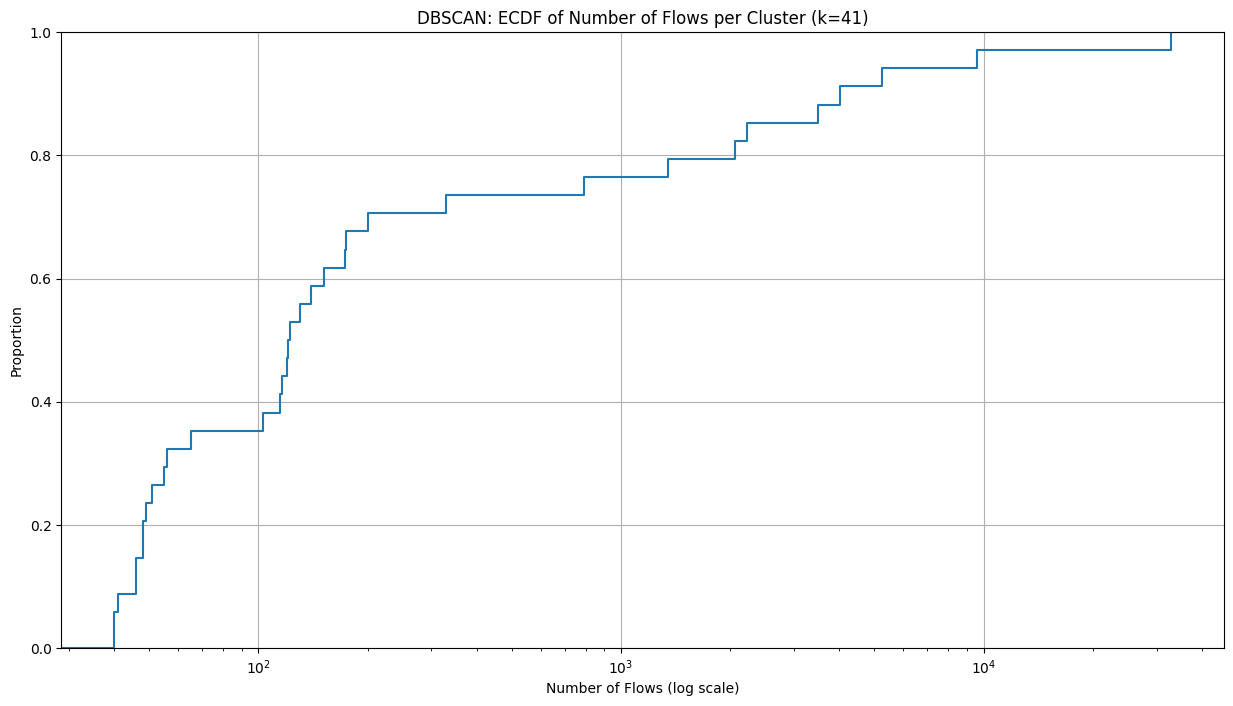

In [63]:
# ECDF of Number of Flows per Cluster
(unique, counts)=np.unique( cl_labels_dbscan_epsmins, return_counts=True)
cluster_sizes = counts
sorted_sizes = np.sort(cluster_sizes)

# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'DBSCAN: ECDF of Number of Flows per Cluster (k={best_n_dbscan})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

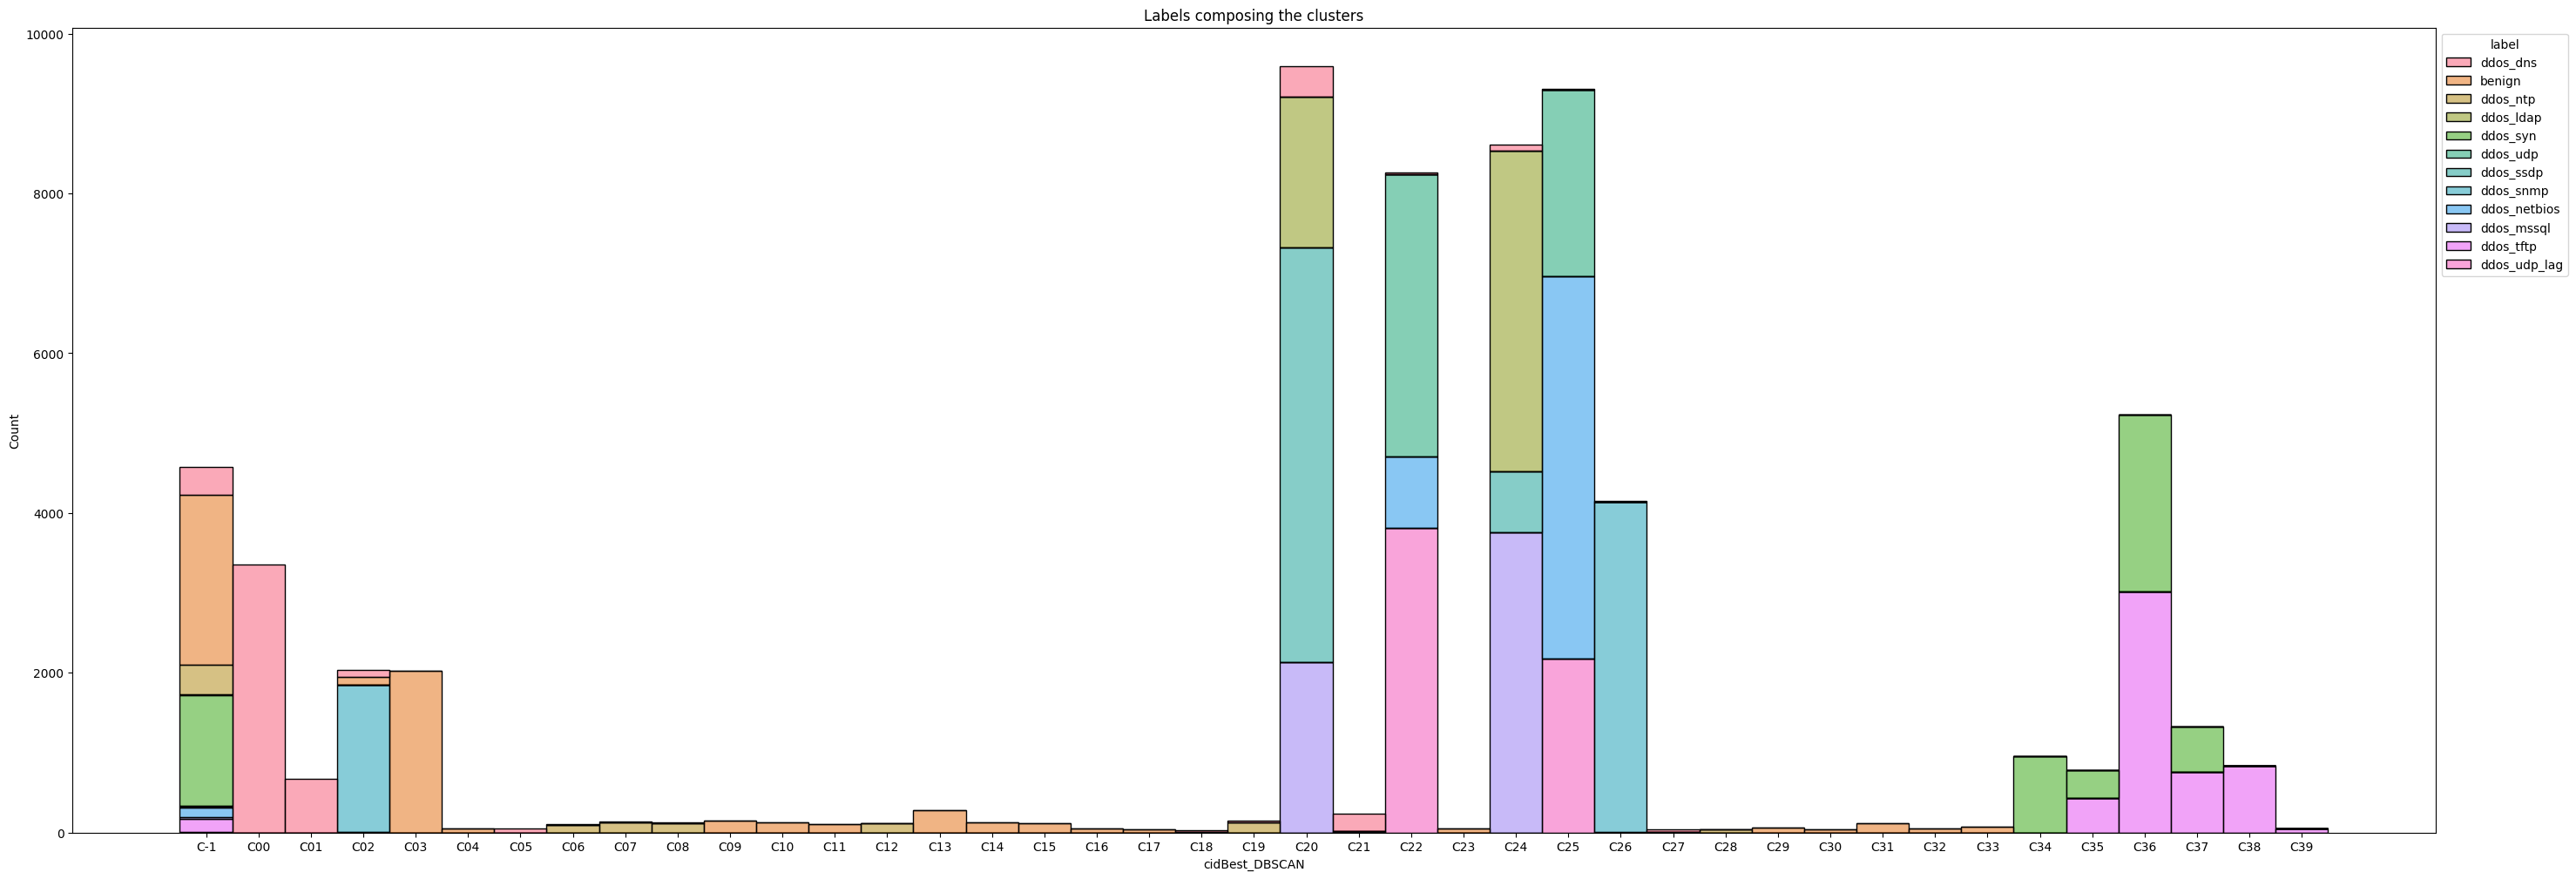

In [64]:
plt.figure(figsize = (35, 12))

ax = sns.histplot(
    data = projection.sort_values('cidBest_DBSCAN'),
    palette="husl",
    x = "cidBest_DBSCAN",
    hue = "label",
    multiple="stack",
    # bins = 50,
    # binrange = (0,49),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

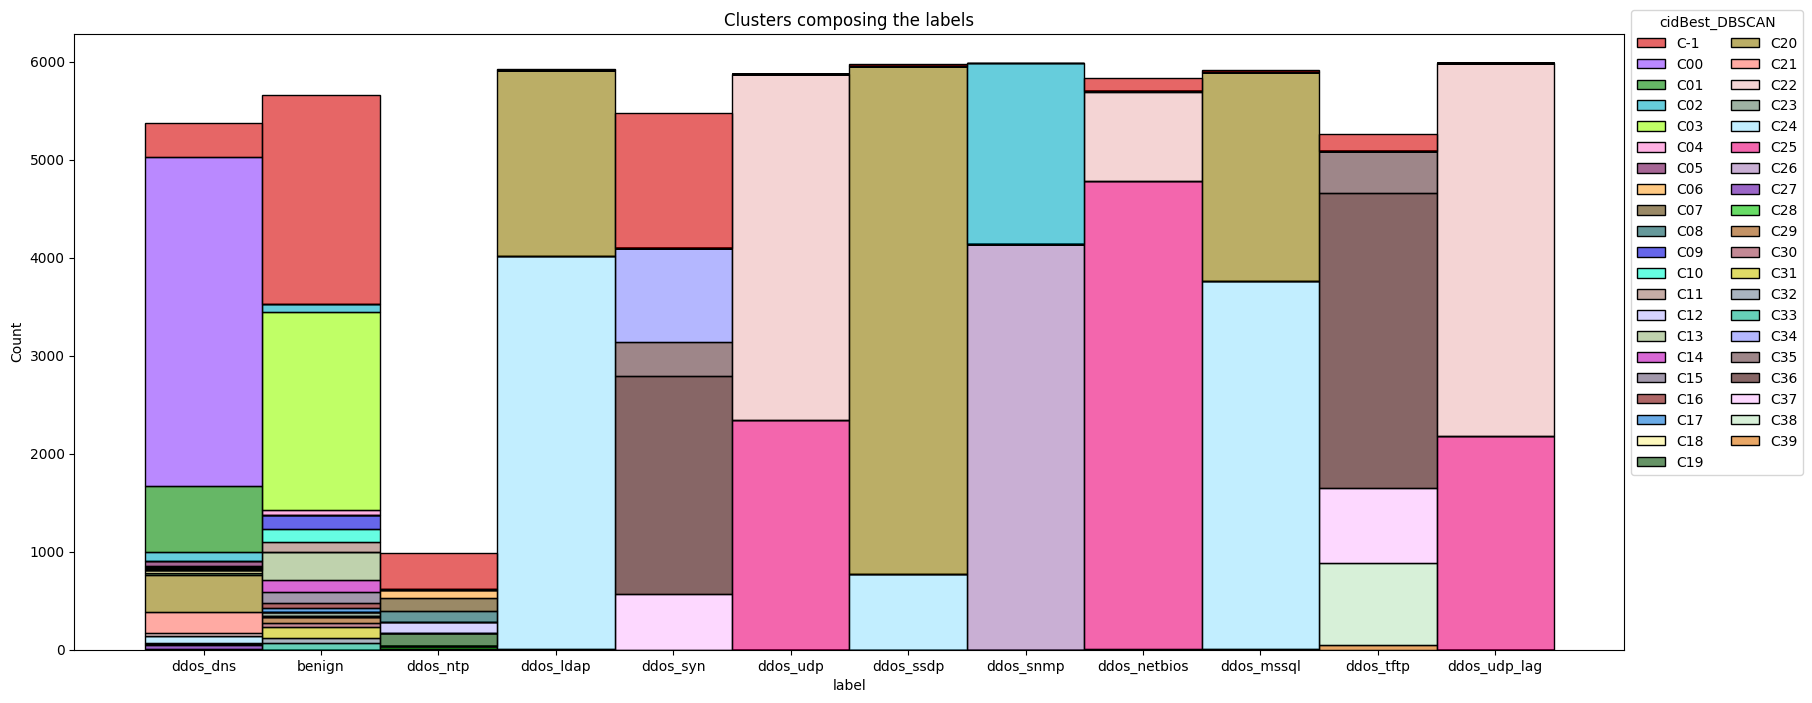

In [65]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection.sort_values('cidBest_DBSCAN'),
    palette=cc.glasbey[0:41],
    x = "label",
    hue = "cidBest_DBSCAN",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.05), ncol=2)

#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()